CTD comparisons with nowcast green

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import netCDF4 as nc
import xarray as xr
from salishsea_tools import geo_tools, tidetools, viz_tools, loadDataFRP
from matplotlib.colors import LinearSegmentedColormap
import cmocean
import pandas as pd
from IPython.display import Image
import matplotlib.patches as mpatches

%matplotlib inline

In [2]:
stationdata, casts = loadDataFRP.loadDataFRP_SSGrid(sel = 'wide')

In [3]:
Bathymetry = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
bathy, X, Y = tidetools.get_bathy_data(Bathymetry)

In [4]:
stationdata.keys()

Index(['Station', 'Date', 'Date_UTC', 'Time_UTC_hhmmss', 'Time_UTC_DecDay',
       'LatDecDeg', 'LonDecDeg', 'LatDecDeg_surface', 'LonDecDeg_surface',
       'LatDecDeg_bottom', 'LonDecDeg_bottom', 'LatDecDeg_surf2',
       'LonDecDeg_surf2', 'LatDecDeg_Niskin', 'LonDecDeg_Niskin',
       'LatDecDeg_end', 'LonDecDeg_end', 'Sounding', 'MaxWireOut_m',
       'waveHeightEst_m', 'cloudyPct', 'filename', 'time_PDT_hhmmss',
       'time_PDT_decDay', 'time_on_PDT_hhmmss', 'time_on_PDT_decDay',
       'time_surface_PDT_hhmmss', 'time_surface_PDT_decDay',
       'time_bottom_PDT_hhmmss', 'time_bottom_PDT_decDay',
       'time_surf2_PDT_hhmmss', 'time_Niskin_PDT_hhmmss',
       'time_off_PDT_hhmmss', 'SecchiDepth_m', 'BottleLetter', 'ALS_Turb_NTU',
       'ALS_TSS_mgL', 'sb19Turb_uncorrected', 'Sal', 'ishift_sub19',
       'pStart25', 'pEnd25', 'pS_pr', 'pE_pr'],
      dtype='object')

In [5]:
stationdata[['Station','Date_UTC','Time_UTC_hhmmss','LatDecDeg','LonDecDeg']]

Station  Date_UTC Time_UTC_hhmmss  LatDecDeg   LonDecDeg
0       1.0  20170410        17:54:17  49.148333 -123.040000
1       2.0  20170410        18:05:11  49.148333 -123.040000
2       3.0  20170410        19:44:22  49.099983 -123.526600
3       4.0  20170410        20:25:40  49.100383 -123.467017
4       5.0  20170410        21:05:12  49.100583 -123.400417
5       6.0  20170410        21:40:15  49.100500 -123.375500
6       7.0  20170410        21:58:48  49.100000 -123.350000
7       8.0  20170410        22:30:56  49.100333 -123.324667
8       9.0  20170410        22:45:20  49.101500 -123.309000
9      10.0  20170531        17:19:23  49.039500 -123.259650
10     11.0  20170531        18:13:05  49.100810 -123.533720
11     12.0  20170531        18:51:36  49.101080 -123.467220
12     13.0  20170531        19:24:38  49.100370 -123.400120
13     14.1  20170531        19:50:40  49.100850 -123.375670
14     14.2  20170531        19:53:25  49.102620 -123.377670
15     15.0  20170531        20:12:26  49.110550 -123.348520
16     16.0  20170531        20:41:47  49.120700 -123.318500
17     17.0  20170531        21:01:03  49.101680 -123.308830
18     18.0  20170531        22:05:25  49.148290 -123.039280

In [6]:
stationdata.iloc[[2]]

Station      Date  Date_UTC Time_UTC_hhmmss  Time_UTC_DecDay  LatDecDeg  \
2      3.0  20170410  20170410        19:44:22         0.822477  49.099983   

   LonDecDeg  LatDecDeg_surface  LonDecDeg_surface  LatDecDeg_bottom  ...    \
2  -123.5266                NaN                NaN               NaN  ...     

   BottleLetter  ALS_Turb_NTU  ALS_TSS_mgL  sb19Turb_uncorrected        Sal  \
2             B           2.4          8.9             53.135185  25.965052   

   ishift_sub19  pStart25  pEnd25  pS_pr  pE_pr  
2             9       599    1939    582   2365  

[1 rows x 44 columns]

In [7]:
mesh = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')
tmask = mesh.variables['tmask'][:]

In [8]:
def where(station):
    fig, ax = plt.subplots(figsize = (5,5))
    viz_tools.plot_coastline(ax, Bathymetry, coords = 'map')
    ax.plot(station['LonDecDeg'].values[0], station['LatDecDeg'].values[0], 'r*')

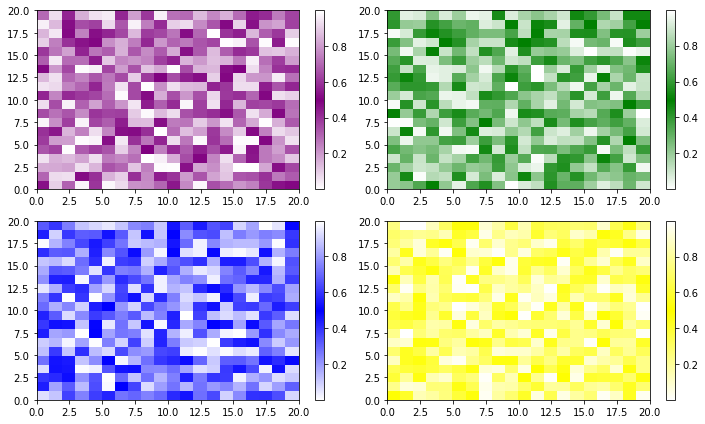

In [9]:
vmax = 1.0
cmap1 = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'white'),
                                                     (0.5 / vmax, 'purple'),
                                                     (1 / vmax, 'white')])
cmap2 = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'white'),
                                                     (0.5 / vmax, 'blue'),
                                                     (1 / vmax, 'white')])
cmap3 = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'white'),
                                                     (0.5 / vmax, 'green'),
                                                     (1 / vmax, 'white')])
cmap4 = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'white'),
                                                     (0.5 / vmax, 'yellow'),
                                                     (1 / vmax, 'white')])
fig, ax = plt.subplots(2,2, figsize = (10,6))
mesh1 = ax[0,0].pcolormesh(np.random.random((20,20)), cmap = cmap1)
cbar1 = fig.colorbar(mesh1, ax=ax[0,0])
mesh1 = ax[1,0].pcolormesh(np.random.random((20,20)), cmap = cmap2)
cbar1 = fig.colorbar(mesh1, ax=ax[1,0])
mesh1 = ax[0,1].pcolormesh(np.random.random((20,20)), cmap = cmap3)
cbar1 = fig.colorbar(mesh1, ax=ax[0,1])
mesh1 = ax[1,1].pcolormesh(np.random.random((20,20)), cmap = cmap4)
cbar1 = fig.colorbar(mesh1, ax=ax[1,1])
fig.tight_layout()

In [10]:
purples = cmap1(np.linspace(0,1,7))
blues = cmap2(np.linspace(0,1,7))
greens = cmap3(np.linspace(0,1,7))
aquas = cmap4(np.linspace(0,1,7))

In [11]:
def compare(station, tmask):
    cast = casts[station['Station'].values[0]]
    Yind, Xind = geo_tools.find_closest_model_point(station['LonDecDeg'].values[0], 
                                                    station['LatDecDeg'].values[0],
                                                    X, Y, land_mask = bathy.mask)
    if station['Date'].values == 20170410:
        base=nc.Dataset('/results/SalishSea/nowcast-green/10apr17/SalishSea_1h_20170410_20170410_grid_T.nc')
        
    else: 
        base=nc.Dataset('/results/SalishSea/nowcast-green/31may17/SalishSea_1h_20170531_20170531_grid_T.nc')
    shape_depth = cast.dCast['depth_m'].values.shape[0]
    if shape_depth > 11:
        fig, ax = plt.subplots(2,2,figsize = (8,10), gridspec_kw = {'height_ratios':[1, 2]} )
        deptht = cast.dCast['depth_m'].values
        cast_sal_down = cast.dCast['gsw_srA0'].values
        cast_sal_up = cast.uCast['gsw_srA0'].values
        cast_temp_down = cast.dCast['gsw_ctA0'].values
        cast_temp_up = cast.uCast['gsw_ctA0'].values
        ax[0,0].plot(cast_sal_down[:11], deptht[:11], 'r-', alpha = 0.6)
        ax[0,0].plot(cast_sal_up[:11], deptht[:11], color='deeppink', alpha = 0.6)
        ax[1,0].plot(cast_sal_down[11:], deptht[11:], 'r-', alpha = 0.6)
        ax[1,0].plot(cast_sal_up[11:], deptht[11:], color='deeppink', alpha = 0.6)
        ax[0,1].plot(cast_temp_down[:11], deptht[:11], 'r-', alpha = 0.6)
        ax[0,1].plot(cast_temp_up[:11], deptht[:11], color='deeppink', alpha = 0.6)
        ax[1,1].plot(cast_temp_down[11:], deptht[11:], 'r-', alpha = 0.6)
        ax[1,1].plot(cast_temp_up[11:], deptht[11:], color='deeppink', alpha = 0.6)
        if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
            delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
            before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
        else:
            delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
            before = int(station['Time_UTC_hhmmss'].values[0][:2])
        n = 1
        for j in range(Yind - 2, Yind + 3):
            pt_mask = tmask[0,:shape_depth,j,Xind]
            masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
            base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,j, Xind]
                                          + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,j, Xind],
                                          mask = 1-pt_mask)
           
            base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,j, Xind]
                                           +(1-delta)*base.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                           mask = 1-pt_mask)
           
            ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[n], alpha = 0.6)
            
            ax[1,0].plot(base_sal[11:], deptht[11:], color = purples[n], alpha = 0.6)
            
            ax[0,1].plot(base_temp[:11], deptht[:11], color = purples[n], alpha = 0.6)
            
            ax[1,1].plot(base_temp[11:], deptht[11:], color = purples[n], alpha = 0.6)
            
            n = n + 1
        m = 1
        for i in range(Xind - 2, Xind + 3):
            pt_mask = tmask[0,:shape_depth,Yind,i]
            masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
            base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, i]
                                          + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, i],
                                          mask = 1-pt_mask)
            base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, i]
                                           +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                           mask = 1-pt_mask)
            ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[n], alpha = 0.6)
            ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[m], alpha = 0.6)
            ax[1,0].plot(base_sal[11:], deptht[11:], color = purples[m], alpha = 0.6)
            ax[0,1].plot(base_temp[:11], deptht[:11], color = purples[m], alpha = 0.6)
            ax[1,1].plot(base_temp[11:], deptht[11:], color = purples[m], alpha = 0.6)
            m = m + 1
    else:
        fig, ax = plt.subplots(1,2,figsize = (8,10) )
        deptht = cast.uCast['depth_m'].values
        cast_sal_down = cast.dCast['gsw_srA0'].values
        cast_sal_up = cast.uCast['gsw_srA0'].values
        cast_temp_down = cast.dCast['gsw_ctA0'].values
        cast_temp_up = cast.uCast['gsw_ctA0'].values
        ax[0].plot(cast_sal_down[:], deptht[:], 'r-', alpha = 0.6)
        ax[0].plot(cast_sal_up[:], deptht[:], color='deeppink', alpha = 0.6)
        ax[1].plot(cast_temp_down[:], deptht[:], 'r-', alpha = 0.6)
        ax[1].plot(cast_temp_up[:], deptht[:], color='deeppink', alpha = 0.6)
        if int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5]) < 30:
            delta = (30 + int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5])) / 60
            before = int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][:2]) - 1
        else:
            delta = (int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
            before = int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][:2])
        n = 1
        for j in range(Yind - 2, Yind + 3):
            pt_mask = tmask[0,:shape_depth,j,Xind]
            masked_depth = np.ma.masked_array(deptht[:shape_depth], mask = 1-pt_mask)
            base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,j, Xind]
                                          + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,j, Xind],
                                          mask = 1-pt_mask)
            
            base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,j, Xind]
                                           +(1-delta)*base.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                           mask = 1-pt_mask)
            
            ax[0].plot(base_sal, deptht, color = purples[n], alpha = 0.6)
            
            ax[1].plot(base_temp, deptht, color = purples[n], alpha = 0.6)
            n = n + 1
        m = 1
        for i in range(Xind - 2, Xind + 3):
            pt_mask = tmask[0,:shape_depth,Yind,i]
            masked_depth = np.ma.masked_array(deptht[:shape_depth], mask = 1-pt_mask)
            base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, i]
                                          + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, i],
                                          mask = 1-pt_mask)

            base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, i]
                                           +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                           mask = 1-pt_mask)
            
            
            ax[0].plot(base_sal, masked_depth, color = purples[m], alpha = 0.6)
            
            ax[1].plot(base_temp, masked_depth, color = purples[m], alpha = 0.6)
            
            m = m + 1
    min_sal = np.nanmin(np.array([np.nanmin(cast_sal_up), np.nanmin(cast_sal_down), 
                                  np.nanmin(base_sal)]))
    max_sal = np.nanmax(np.array([np.nanmax(cast_sal_up), np.nanmax(cast_sal_down), 
                                  np.nanmax(base_sal)]))
    min_temp = np.nanmin(np.array([np.nanmin(cast_temp_up), np.nanmin(cast_temp_down), 
                                 np.nanmin(base_temp)]))
    max_temp = np.nanmax(np.array([np.nanmax(cast_temp_up), np.nanmax(cast_temp_down), 
                                 np.nanmax(base_temp)]))
    if shape_depth > 11:
        ax[0,0].set_ylim(11,0)
        ax[0,1].set_ylim(11,0)
        ax[1,0].set_ylim(100,12)
        ax[1,1].set_ylim(100,12)
        ax[0,0].set_xlim(min_sal-1,max_sal+1)
        ax[0,1].set_xlim(min_temp-0.5,max_temp+0.5)
        ax[1,0].set_xlim(min_sal-1,max_sal+1)
        ax[1,1].set_xlim(min_temp-0.5,max_temp+0.5)
        ax[0,0].set_title('Salinity, Station ' + str(station['Station'].values[0]))
        ax[0,1].set_title('Temperature, Station ' + str(station['Station'].values[0]))
        ax[0,0].tick_params(labelbottom='off')
        ax[0,1].tick_params(labelbottom='off')
        ax[0,0].grid('on')
        ax[0,1].grid('on')
        ax[1,0].grid('on')
        ax[1,1].grid('on')
    else:
        ax[0].set_ylim(11,0)
        ax[1].set_ylim(11,0)
        ax[0].set_xlim(min_sal-1,max_sal+1)
        ax[1].set_xlim(min_temp-0.5,max_temp+0.5)
        ax[0].set_title('Salinity, Station ' + str(station['Station'].values[0]))
        ax[1].set_title('Temperature, Station ' + str(station['Station'].values[0]))
        ax[0].grid('on')
        ax[1].grid('on')
    purple_patch = mpatches.Patch(color='purple', label='Nowcast-Green')
    red_patch = mpatches.Patch(color = 'red', label = 'DownCast')
    pink_patch = mpatches.Patch(color = 'deeppink', label = 'UpCast')
    plt.legend(handles = [purple_patch, red_patch, pink_patch])
    fig.tight_layout()
    return ax

In [12]:
def compare_closest(station, tmask):
    cast = casts[station['Station'].values[0]]
    Yind, Xind = geo_tools.find_closest_model_point(station['LonDecDeg'].values[0], 
                                                    station['LatDecDeg'].values[0],
                                                    X, Y, land_mask = bathy.mask)
    if station['Date'].values == 20170410:
        base=nc.Dataset('/results/SalishSea/nowcast-green/10apr17/SalishSea_1h_20170410_20170410_grid_T.nc')
        
    else: 
        base=nc.Dataset('/results/SalishSea/nowcast-green/31may17/SalishSea_1h_20170531_20170531_grid_T.nc')
        
    shape_depth = cast.dCast['depth_m'].values.shape[0]
    if shape_depth > 11:
        fig, ax = plt.subplots(2,2,figsize = (8,10), gridspec_kw = {'height_ratios':[1, 2]} )
        deptht = cast.dCast['depth_m'].values
        cast_sal_down = cast.dCast['gsw_srA0'].values
        cast_sal_up = cast.uCast['gsw_srA0'].values
        cast_temp_down = cast.dCast['gsw_ctA0'].values
        cast_temp_up = cast.uCast['gsw_ctA0'].values
        ax[0,0].plot(cast_sal_down[:11], deptht[:11], 'r-', alpha = 0.6)
        ax[0,0].plot(cast_sal_up[:11], deptht[:11], color='deeppink', alpha = 0.6)
        ax[1,0].plot(cast_sal_down[11:], deptht[11:], 'r-', alpha = 0.6)
        ax[1,0].plot(cast_sal_up[11:], deptht[11:], color='deeppink', alpha = 0.6)
        ax[0,1].plot(cast_temp_down[:11], deptht[:11], 'r-', alpha = 0.6)
        ax[0,1].plot(cast_temp_up[:11], deptht[:11], color='deeppink', alpha = 0.6)
        ax[1,1].plot(cast_temp_down[11:], deptht[11:], 'r-', alpha = 0.6)
        ax[1,1].plot(cast_temp_up[11:], deptht[11:], color='deeppink', alpha = 0.6)
        if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
            delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
            before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
        else:
            delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
            before = int(station['Time_UTC_hhmmss'].values[0][:2])
        pt_mask = tmask[0,:shape_depth,Yind,Xind]
        masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
        base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                      + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                                      mask = 1-pt_mask)
        
        base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                                       +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                       mask = 1-pt_mask)
        

        ax[0,0].plot(base_sal[:11], deptht[:11], color = 'purple', alpha = 0.6)

        ax[1,0].plot(base_sal[11:], deptht[11:], color = 'purple', alpha = 0.6)
        
        ax[0,1].plot(base_temp[:11], deptht[:11], color = 'purple', alpha = 0.6)
        
        ax[1,1].plot(base_temp[11:], deptht[11:], color = 'purple', alpha = 0.6)
        
    else:
        fig, ax = plt.subplots(1,2,figsize = (8,10) )
        deptht = cast.uCast['depth_m'].values
        cast_sal_down = cast.dCast['gsw_srA0'].values
        cast_sal_up = cast.uCast['gsw_srA0'].values
        cast_temp_down = cast.dCast['gsw_ctA0'].values
        cast_temp_up = cast.uCast['gsw_ctA0'].values
        ax[0].plot(cast_sal_down[:], deptht[:], 'r-', alpha = 0.6)
        ax[0].plot(cast_sal_up[:], deptht[:], color='deeppink', alpha = 0.6)
        ax[1].plot(cast_temp_down[:], deptht[:], 'r-', alpha = 0.6)
        ax[1].plot(cast_temp_up[:], deptht[:], color='deeppink', alpha = 0.6)
        if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
            delta = (30 + int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5])) / 60
            before = int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][:2]) - 1
        else:
            delta = (int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
            before = int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][:2])
        pt_mask = tmask[0,:shape_depth,Yind,Xind]
        masked_depth = np.ma.masked_array(deptht[:shape_depth], mask = 1-pt_mask)
        base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                      + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                                      mask = 1-pt_mask)
        
        base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                                       +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                       mask = 1-pt_mask)
        
        
        ax[0].plot(base_sal, deptht, color = 'purple', alpha = 0.6)
       
        ax[1].plot(base_temp, deptht, color = 'purple', alpha = 0.6)
        
    min_sal = np.nanmin(np.array([np.nanmin(cast_sal_up), np.nanmin(cast_sal_down), np.nanmin(base_sal)]))
    max_sal = np.nanmax(np.array([np.nanmax(cast_sal_up), np.nanmax(cast_sal_down), 
                                  np.nanmax(base_sal)]))
    min_temp = np.nanmin(np.array([np.nanmin(cast_temp_up), np.nanmin(cast_temp_down), 
                                 np.nanmin(base_temp)]))
    max_temp = np.nanmax(np.array([np.nanmax(cast_temp_up), np.nanmax(cast_temp_down), 
                                 np.nanmax(base_temp)]))

    if shape_depth > 11:
        ax[0,0].set_ylim(11,0)
        ax[0,1].set_ylim(11,0)
        ax[1,0].set_ylim(100,12)
        ax[1,1].set_ylim(100,12)
        ax[0,0].set_xlim(min_sal-1,max_sal+1)
        ax[0,1].set_xlim(min_temp-0.5,max_temp+0.5)
        ax[1,0].set_xlim(min_sal-1,max_sal+1)
        ax[1,1].set_xlim(min_temp-0.5,max_temp+0.5)
        ax[0,0].set_title('Salinity, Station ' + str(station['Station'].values[0]))
        ax[0,1].set_title('Temperature, Station ' + str(station['Station'].values[0]))
        ax[0,0].tick_params(labelbottom='off')
        ax[0,1].tick_params(labelbottom='off')
        ax[0,0].grid('on')
        ax[0,1].grid('on')
        ax[1,0].grid('on')
        ax[1,1].grid('on')
    else:
        ax[0].set_ylim(11,0)
        ax[1].set_ylim(11,0)
        ax[0].set_xlim(min_sal-1,max_sal+1)
        ax[1].set_xlim(min_temp-0.5,max_temp+0.5)
        ax[0].set_title('Salinity, Station ' + str(station['Station'].values[0]))
        ax[1].set_title('Temperature, Station ' + str(station['Station'].values[0]))
        ax[0].grid('on')
        ax[1].grid('on')
    purple_patch = mpatches.Patch(color='purple', label='Nowcast-Green')
    red_patch = mpatches.Patch(color = 'red', label = 'DownCast')
    pink_patch = mpatches.Patch(color = 'deeppink', label = 'UpCast')
    plt.legend(handles = [purple_patch, red_patch, pink_patch])
    fig.tight_layout()
    return ax

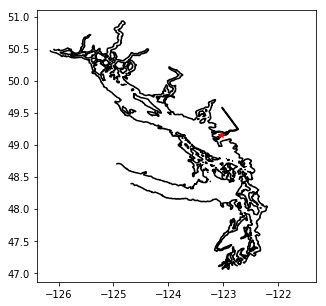

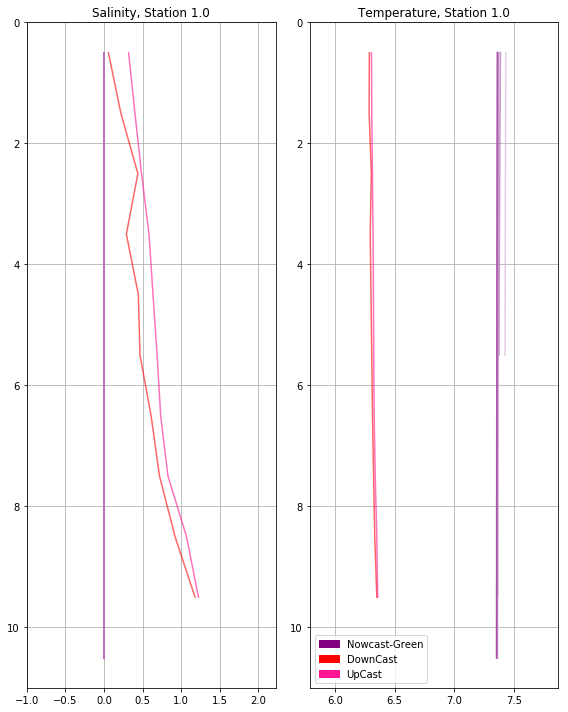

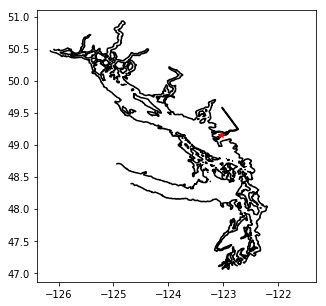

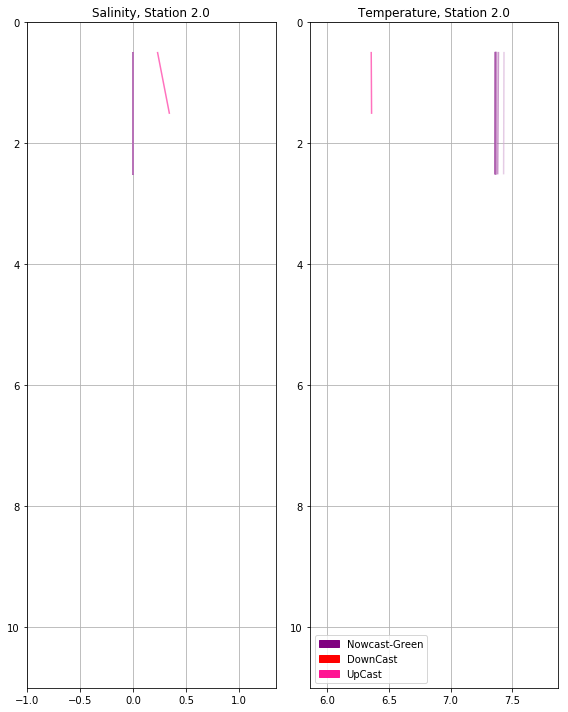

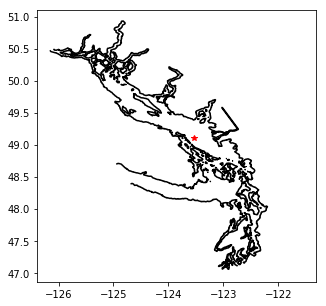

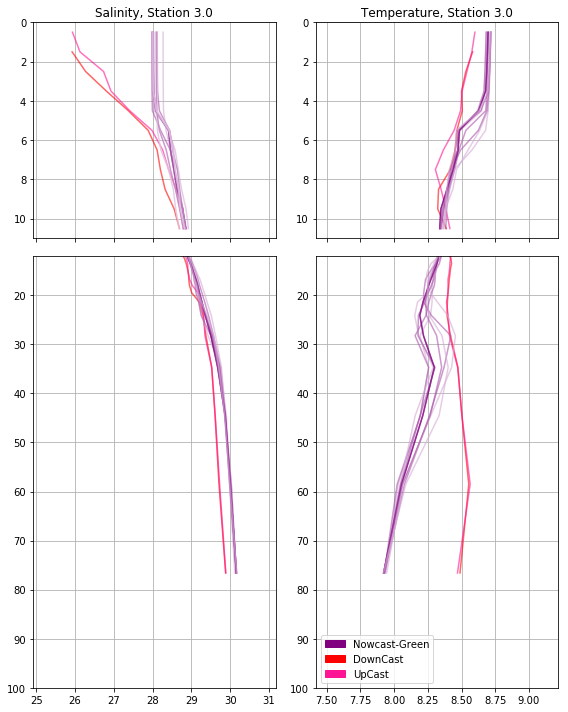

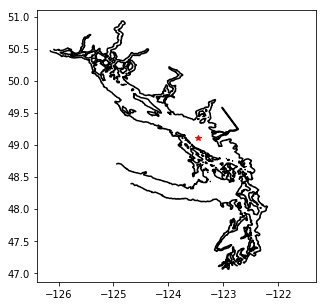

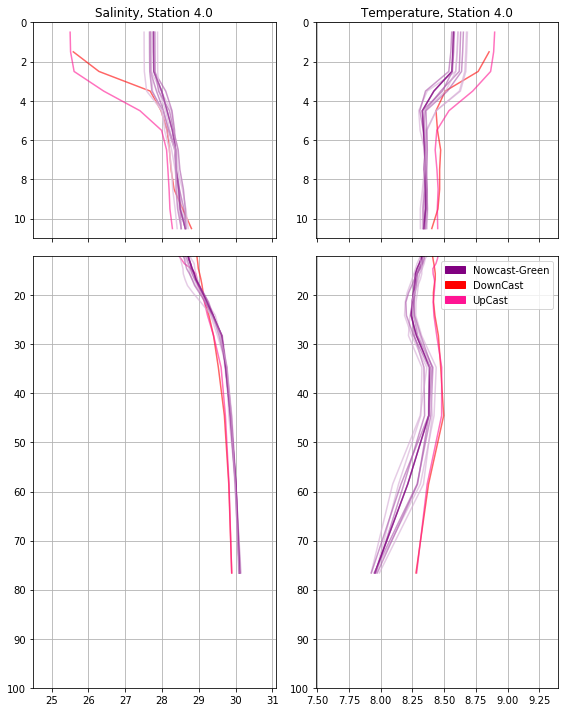

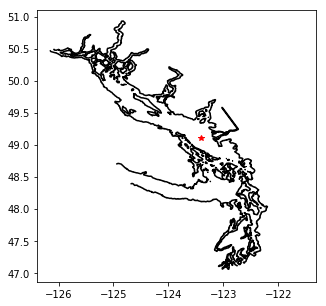

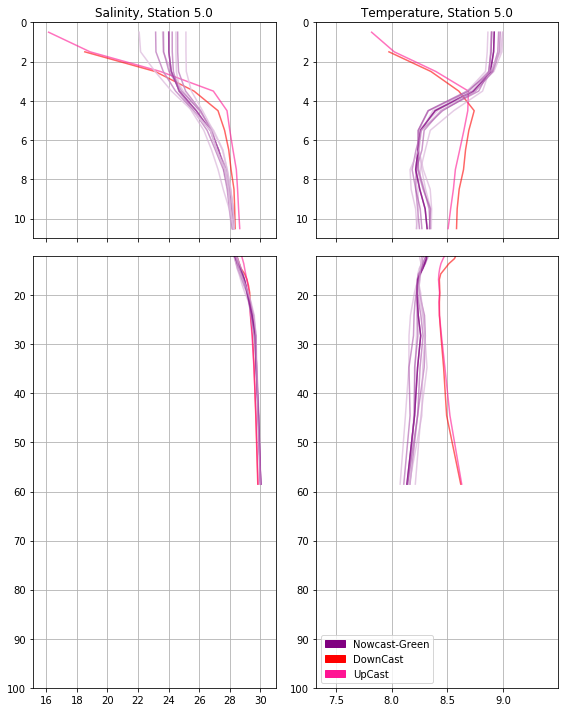

In [14]:
for n in range(5):
    where(stationdata.iloc[[n]]);
    compare(stationdata.iloc[[n]], tmask);

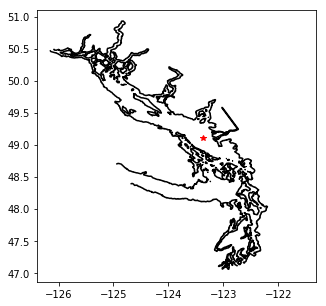

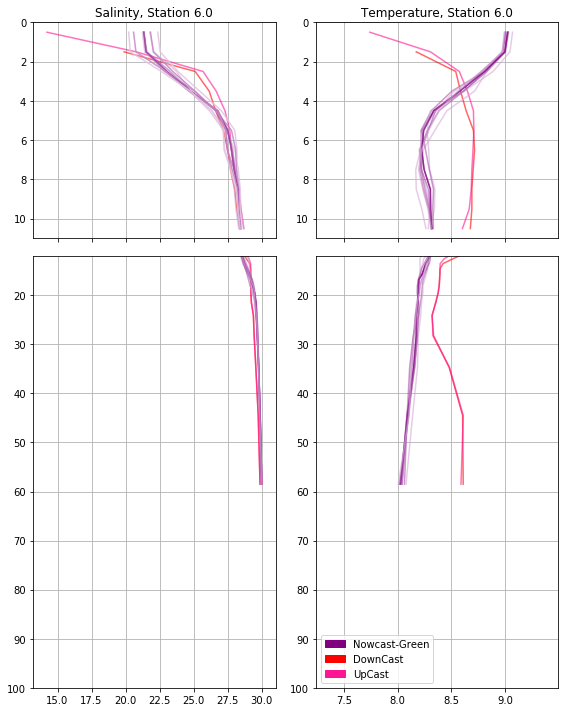

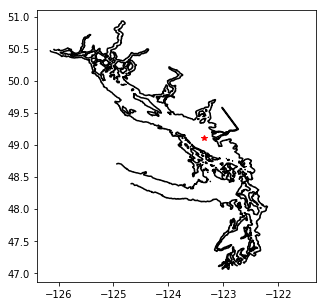

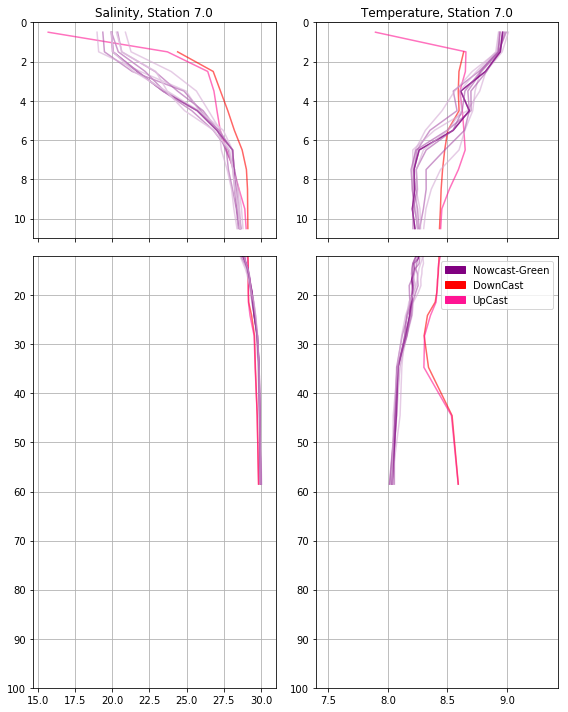

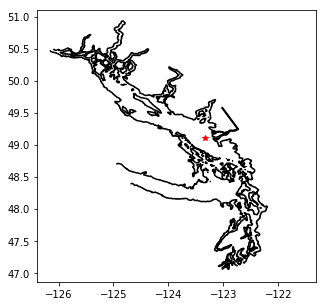

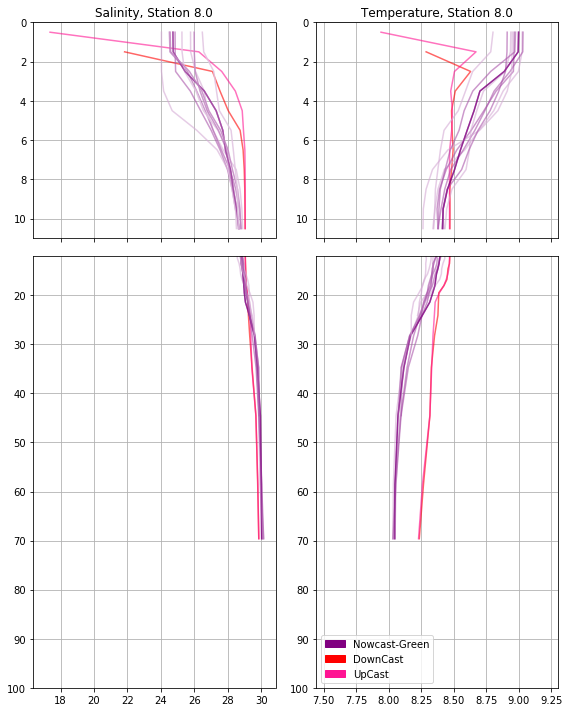

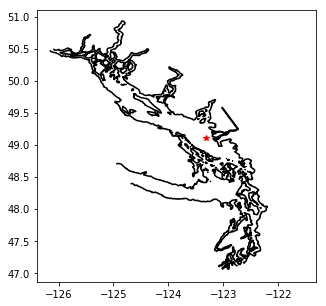

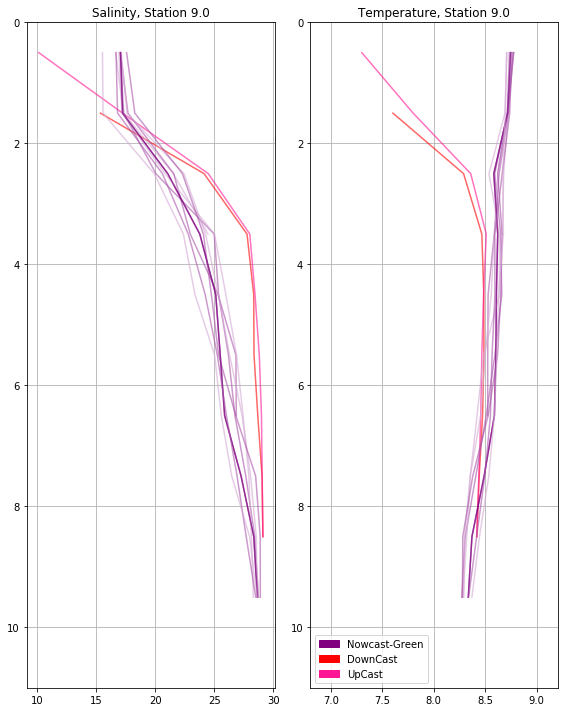

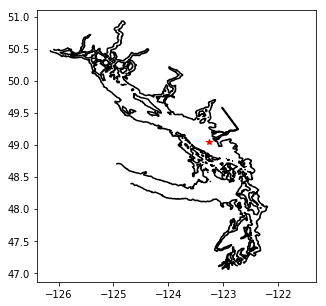

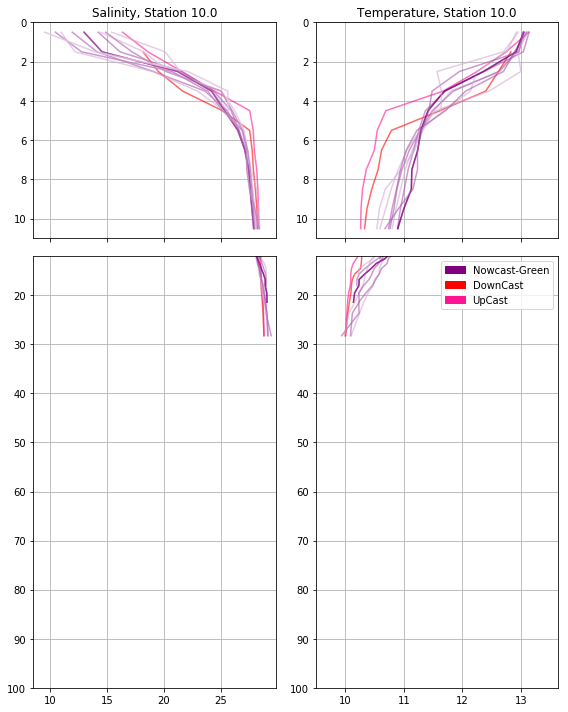

In [15]:
for n in range(5,10):
    where(stationdata.iloc[[n]]);
    compare(stationdata.iloc[[n]], tmask);

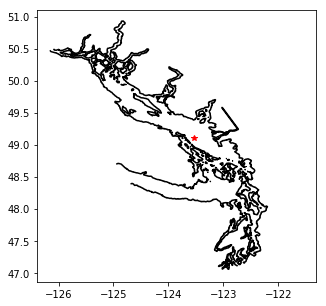

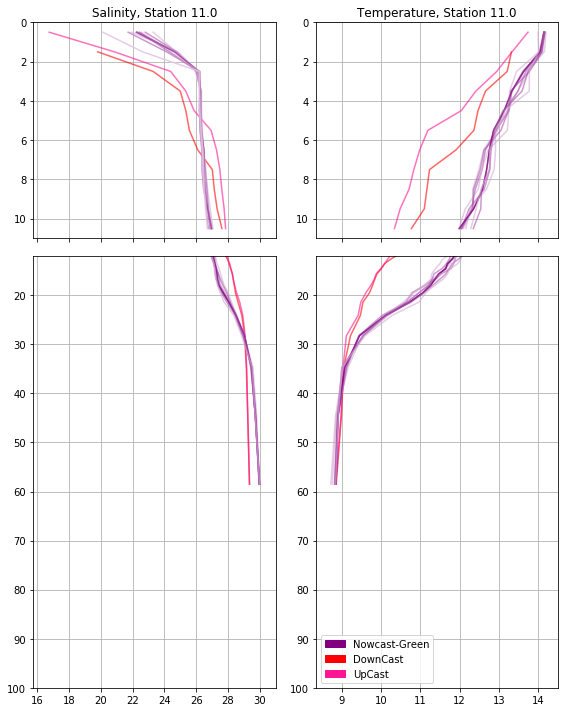

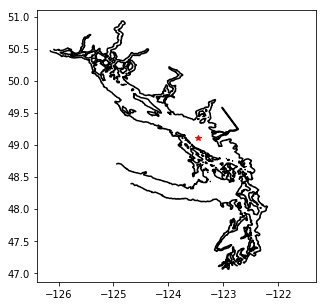

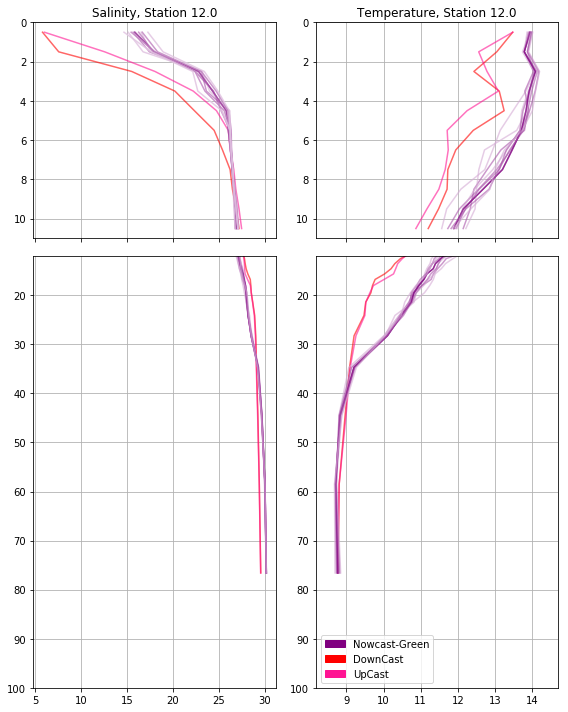

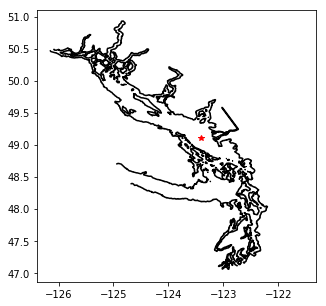

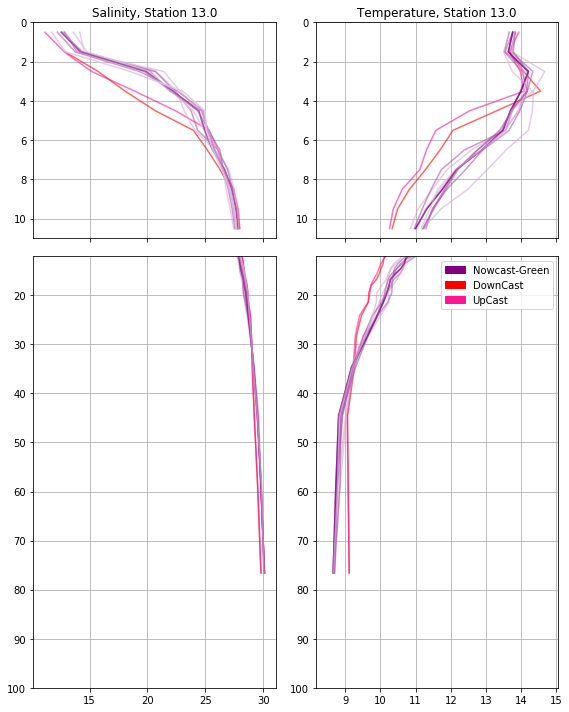

In [16]:
for n in range(10,13):
    where(stationdata.iloc[[n]]);
    compare(stationdata.iloc[[n]], tmask);

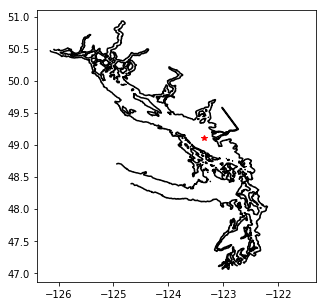

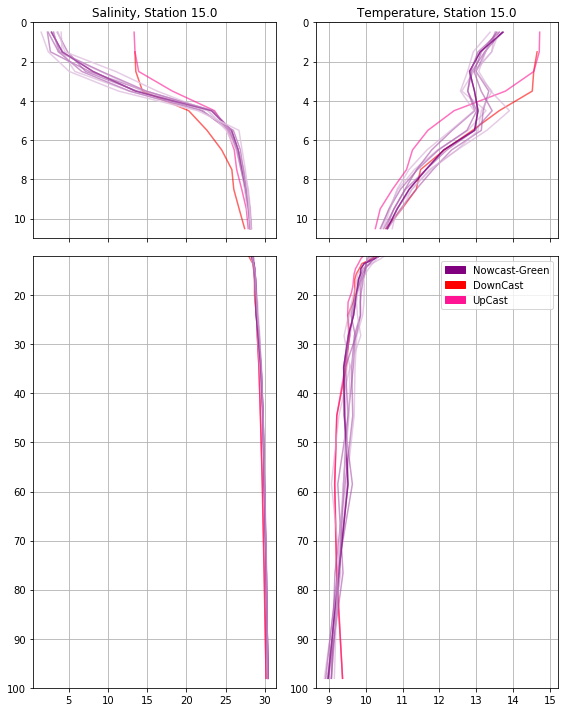

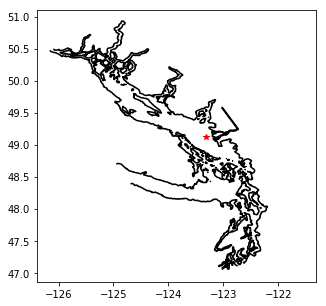

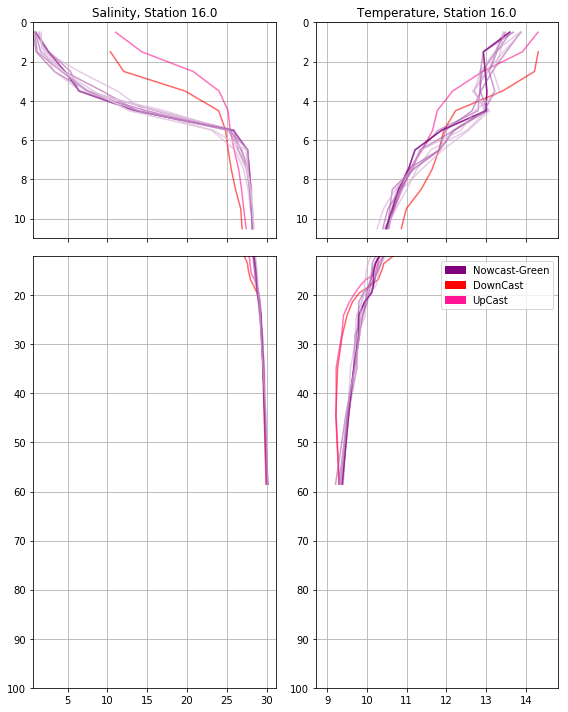

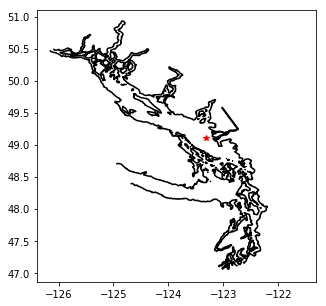

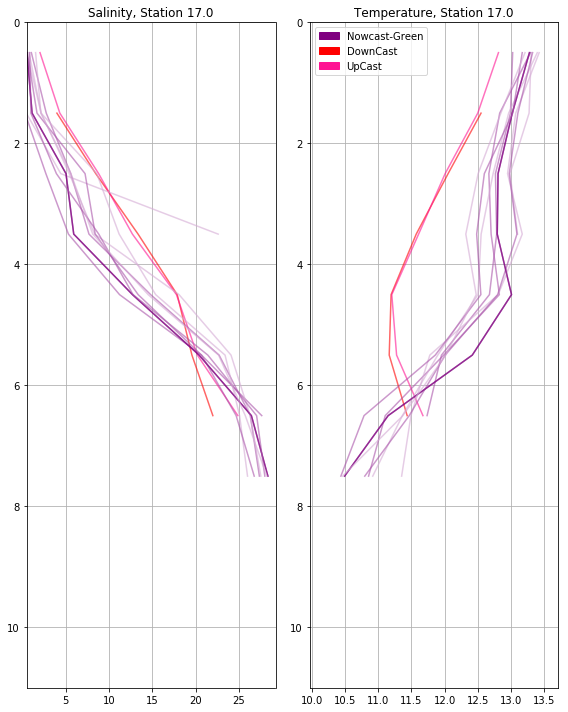

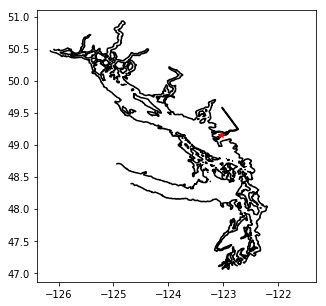

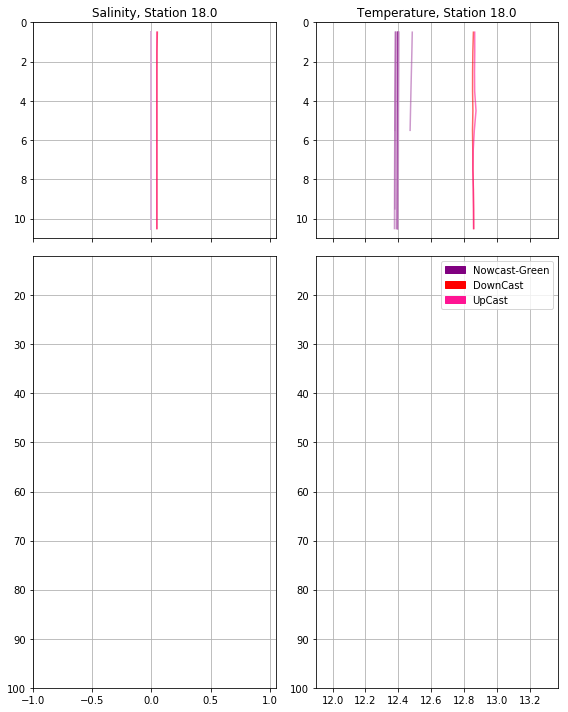

In [17]:
for n in range(15,19):
    where(stationdata.iloc[[n]]);
    compare(stationdata.iloc[[n]], tmask);

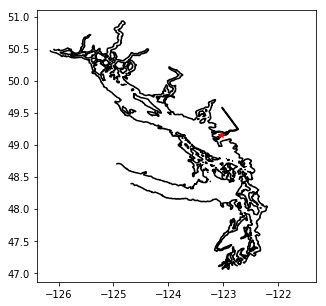

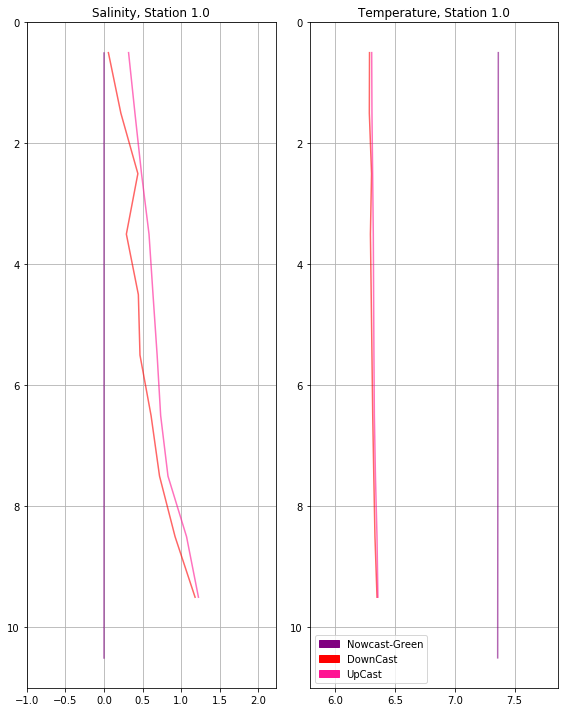

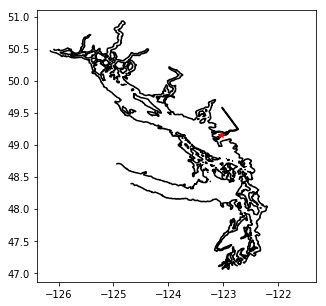

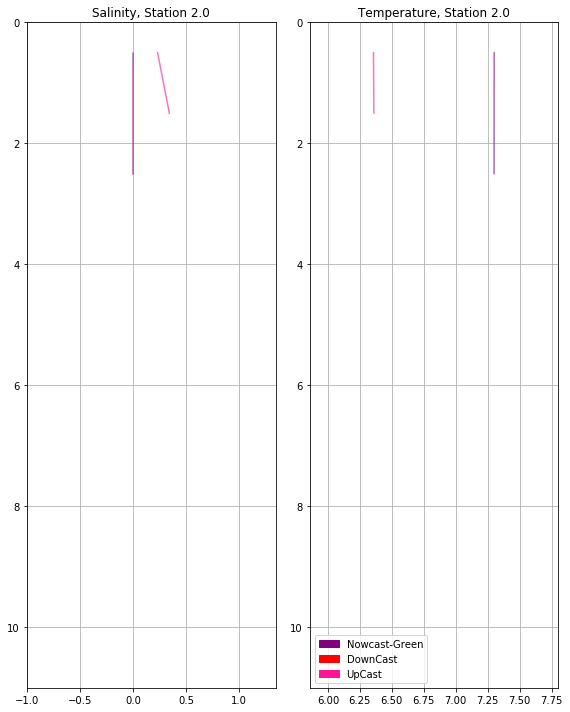

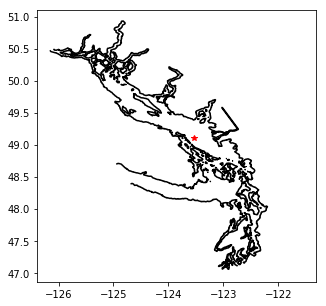

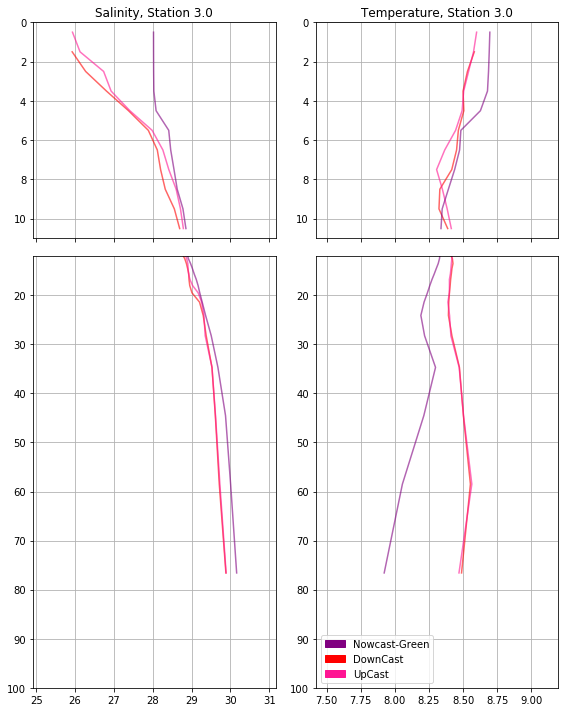

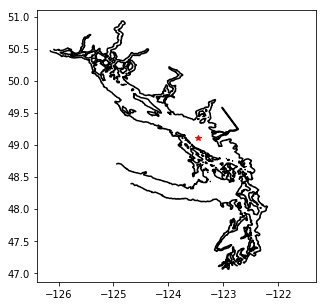

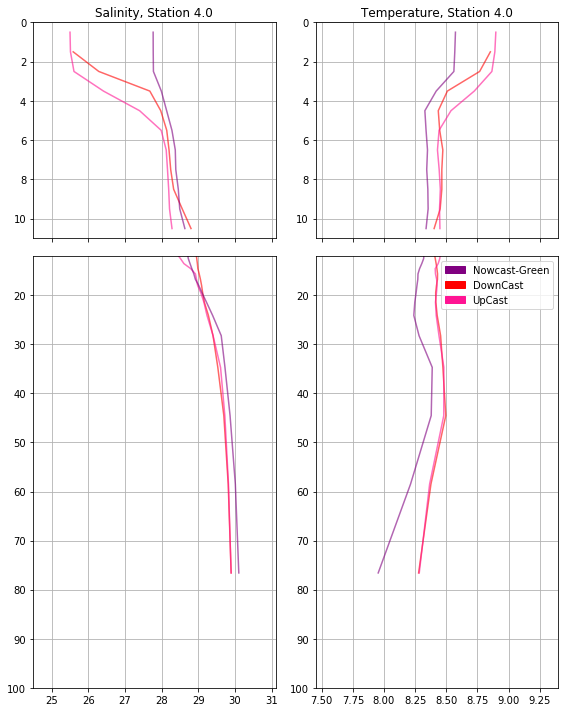

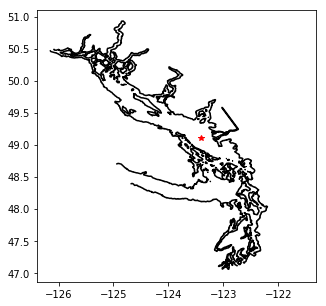

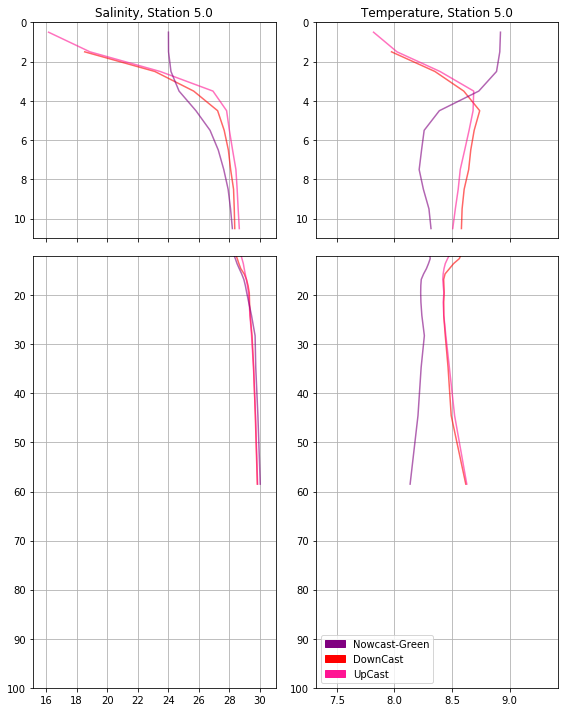

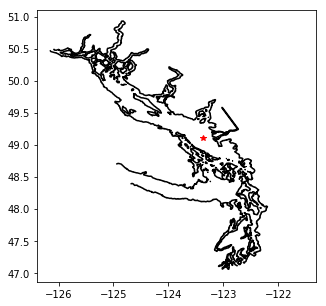

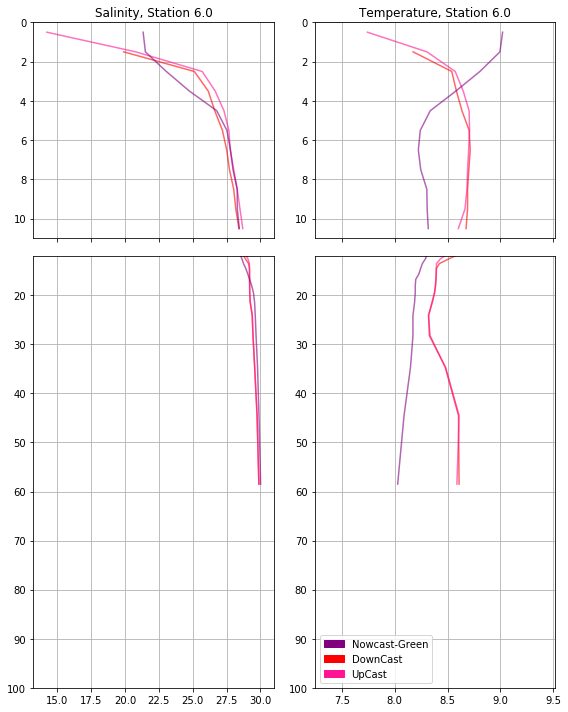

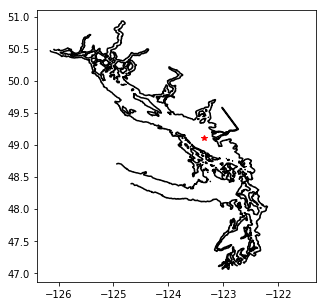

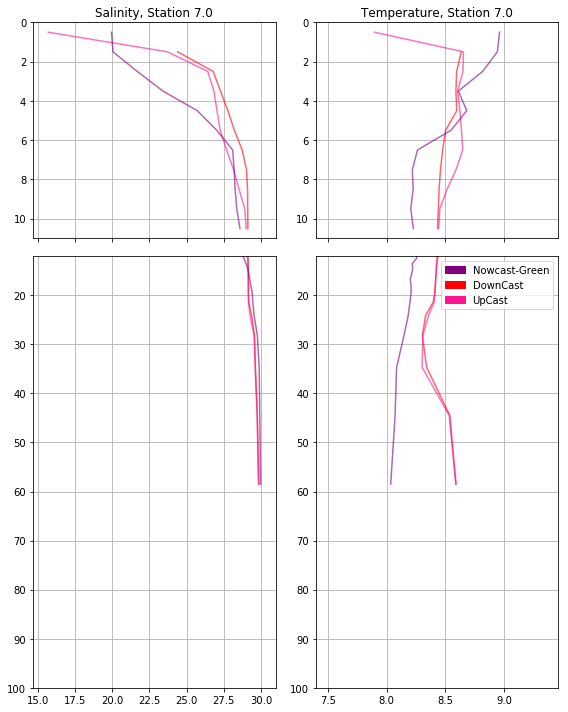

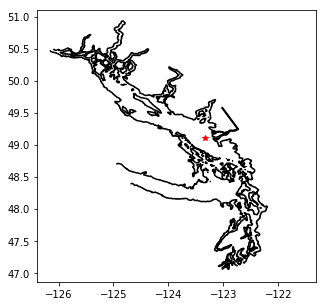

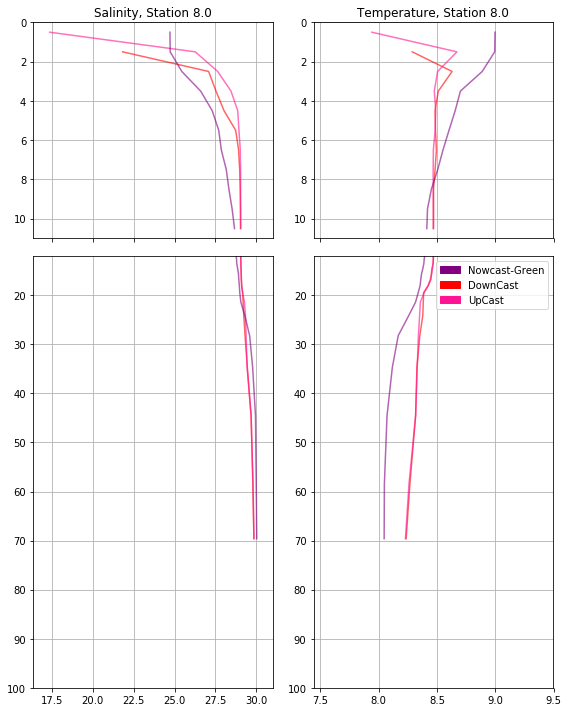

In [18]:
for n in range(8):
    where(stationdata.iloc[[n]]);
    compare_closest(stationdata.iloc[[n]], tmask);

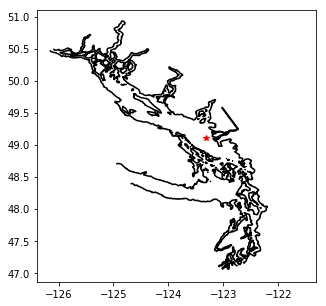

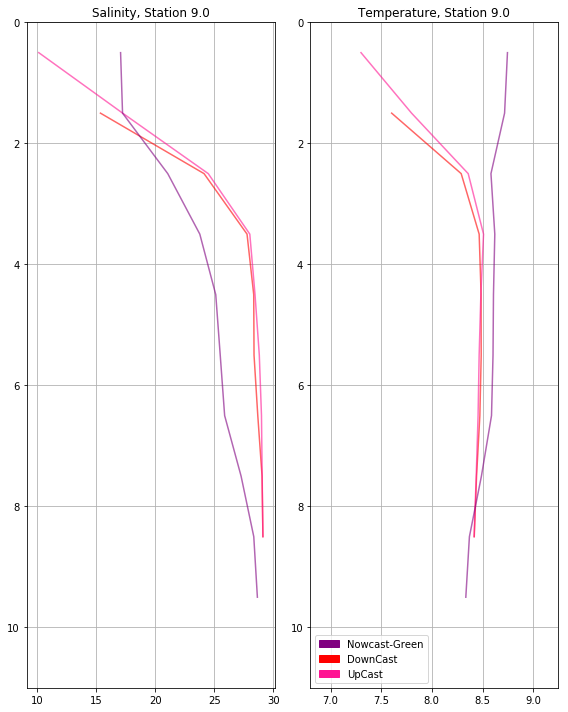

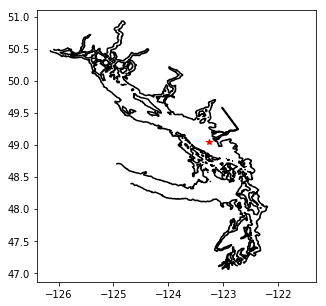

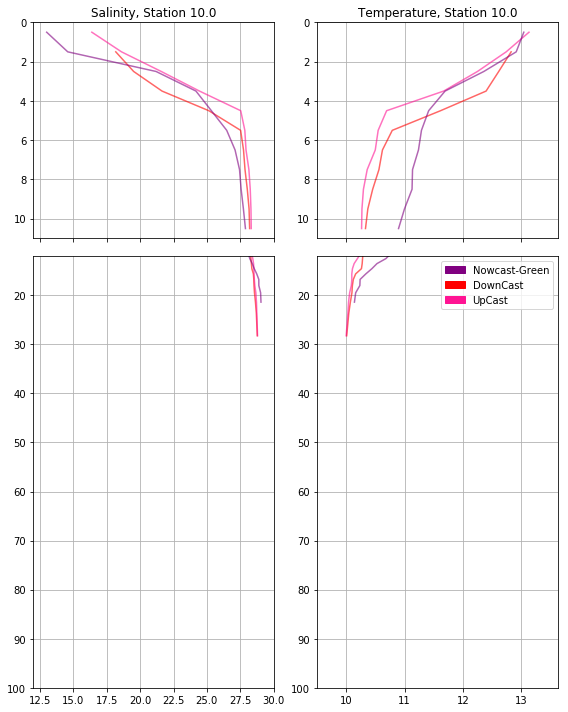

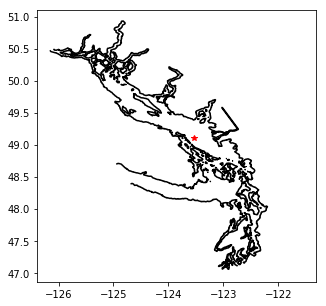

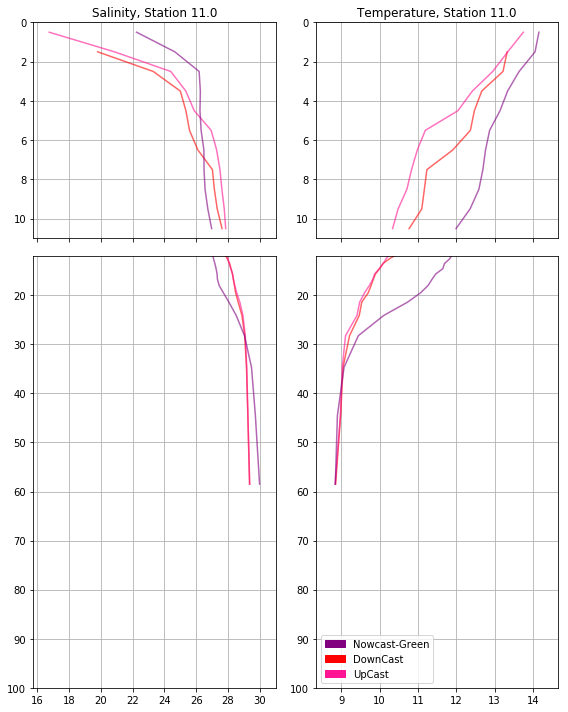

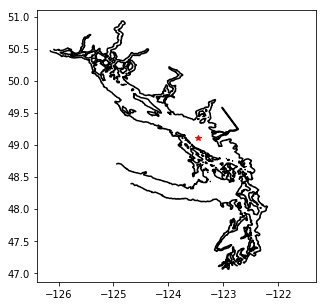

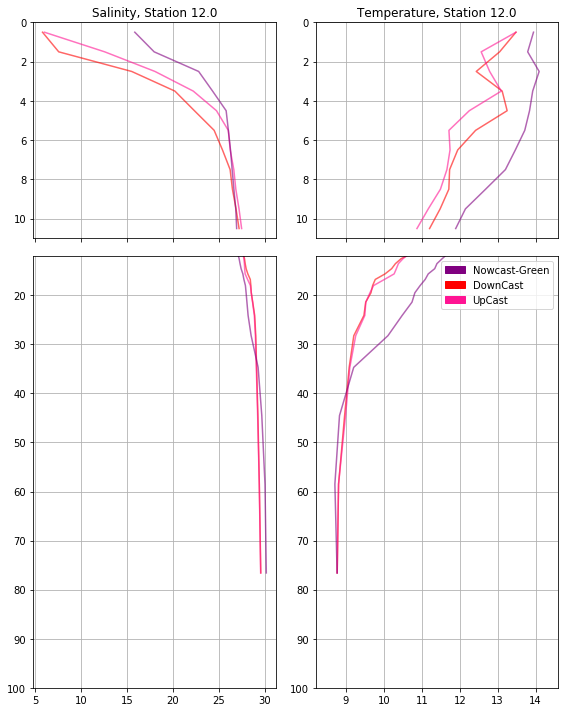

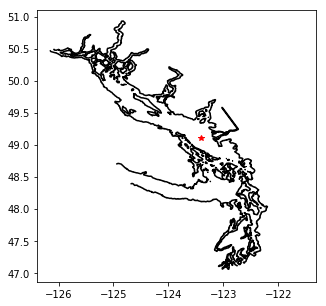

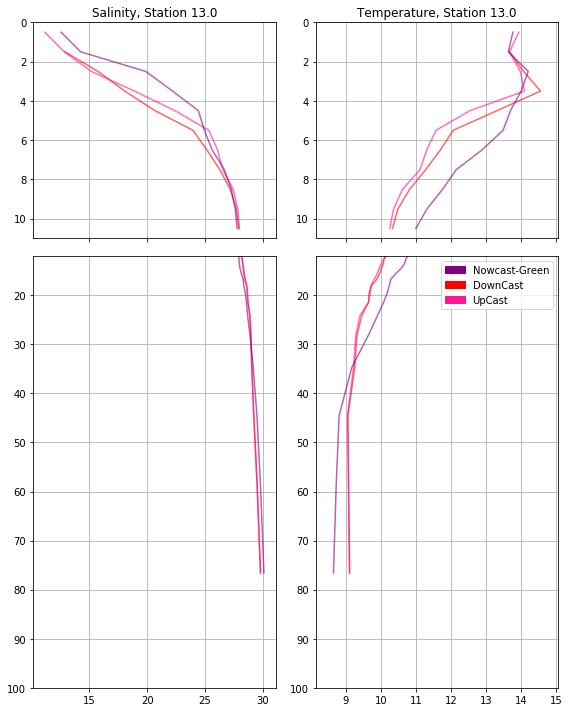

In [19]:
for n in range(8,13):
    where(stationdata.iloc[[n]]);
    compare_closest(stationdata.iloc[[n]], tmask);

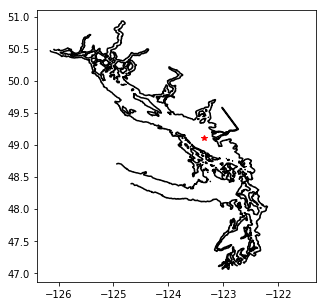

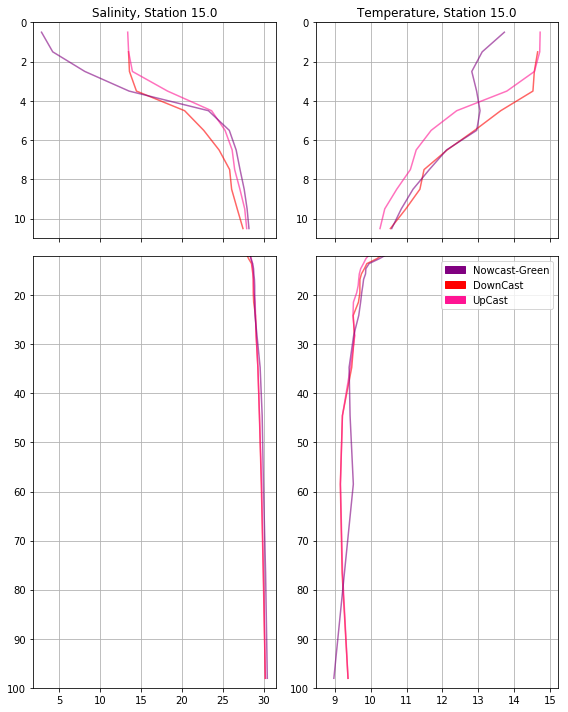

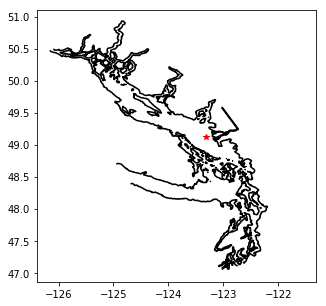

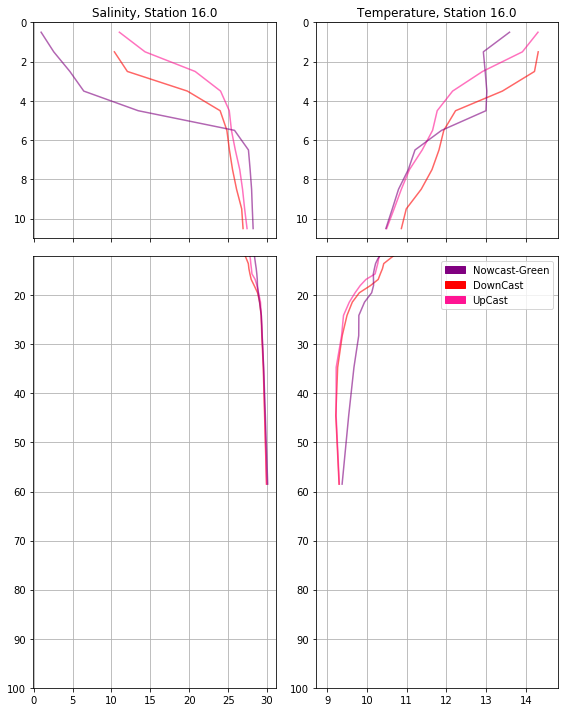

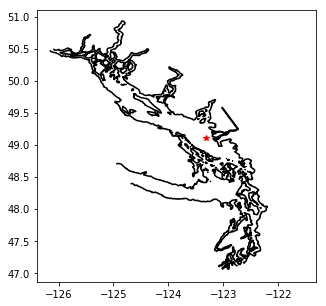

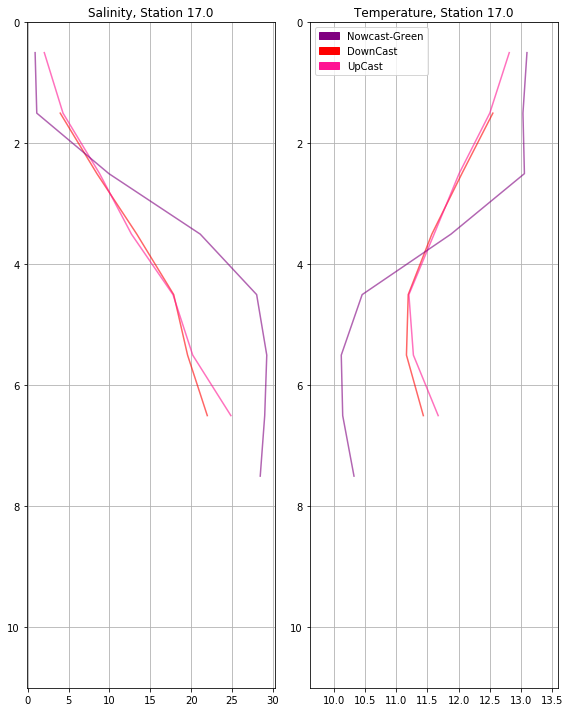

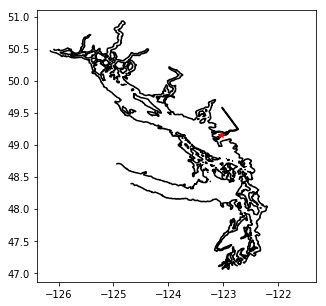

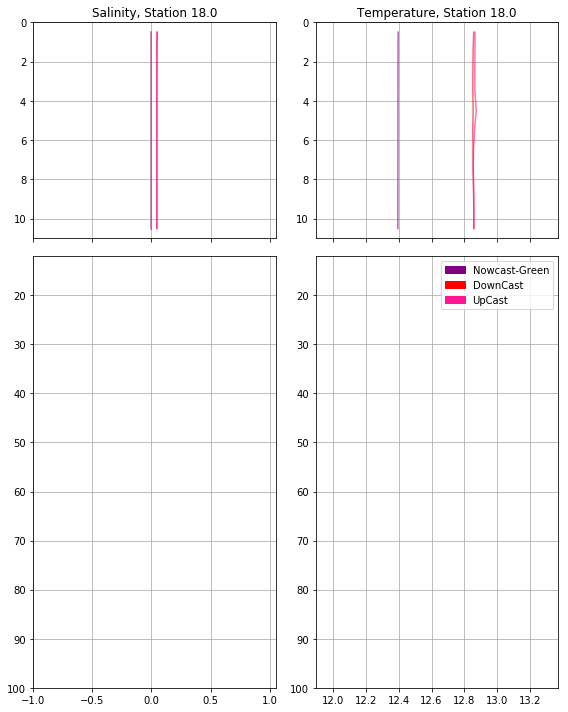

In [20]:
for n in range(15,19):
    where(stationdata.iloc[[n]]);
    compare_closest(stationdata.iloc[[n]], tmask);

In [21]:
obs_sal = np.array([])
model_base_sal = np.array([])
obs_temp = np.array([])
model_base_temp = np.array([])
for n in range(19):
    if (n != 14):
        if n != 13:
            print(n)
            station = stationdata.iloc[[n]]
            cast = casts[station['Station'].values[0]]
            Yind, Xind = geo_tools.find_closest_model_point(station['LonDecDeg'].values[0], 
                                                            station['LatDecDeg'].values[0],
                                                            X, Y, land_mask = bathy.mask)
            shape_depth = cast.uCast['depth_m'].values.shape[0]
            if mesh.variables['tmask'][0,0,Yind, Xind] == 1:
                if station['Date'].values == 20170410:
                    base=nc.Dataset('/results/SalishSea/nowcast-green/10apr17/SalishSea_1h_20170410_20170410_grid_T.nc')
                    
                else: 
                    base=nc.Dataset('/results/SalishSea/nowcast-green/31may17/SalishSea_1h_20170531_20170531_grid_T.nc')

                deptht = base.variables['deptht'][:shape_depth]
                cast_sal_down = cast.dCast['gsw_srA0'].values
                cast_sal_up = cast.uCast['gsw_srA0'].values
                cast_temp_down = cast.dCast['gsw_ctA0'].values
                cast_temp_up = cast.uCast['gsw_ctA0'].values
                if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
                    delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
                    before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
                else:
                    delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
                    before = int(station['Time_UTC_hhmmss'].values[0][:2])
                pt_mask = tmask[0,:shape_depth,Yind,Xind]
                m_cast_sal_down = np.ma.masked_array(cast_sal_down, mask = 1-pt_mask)
                m_cast_sal_up = np.ma.masked_array(cast_sal_up, mask = 1-pt_mask)
                m_cast_temp_down = np.ma.masked_array(cast_temp_down, mask = 1-pt_mask)
                m_cast_temp_up = np.ma.masked_array(cast_sal_up, mask = 1-pt_mask)
                masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
                base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                              + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                                              mask = 1-pt_mask)
            
                base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                                               +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                               mask = 1-pt_mask)
                
                m_cast_temp_up2 = np.ma.masked_invalid(m_cast_temp_up)
                m_cast_temp_down2 = np.ma.masked_invalid(m_cast_temp_down)
                m_cast_sal_up2 = np.ma.masked_invalid(m_cast_sal_up)
                m_cast_sal_down2 = np.ma.masked_invalid(m_cast_sal_down)
                obs_sal = np.append(obs_sal, np.append(m_cast_sal_up2, m_cast_sal_down2))
                model_base_sal = np.append(model_base_sal, np.append(base_sal, base_sal))
                
                obs_temp = np.append(obs_temp, np.append(m_cast_temp_up2, m_cast_temp_down2))
                model_base_temp = np.append(model_base_temp, np.append(base_temp, base_temp))
                

0
1
2
3
4
5
6
7
8
9
10
11
12
15
16
17
18


In [22]:
station = stationdata.iloc[[13]]
cast = casts[station['Station'].values[0]]
Yind, Xind = geo_tools.find_closest_model_point(station['LonDecDeg'].values[0], 
                                                station['LatDecDeg'].values[0],
                                                X, Y, land_mask = bathy.mask)
shape_depth = cast.dCast['depth_m'].values.shape[0]
if mesh.variables['tmask'][0,0,Yind, Xind] == 1:
    if station['Date'].values == 20170410:
        base=nc.Dataset('/results/SalishSea/nowcast-green/10apr17/SalishSea_1h_20170410_20170410_grid_T.nc')
        
    else: 
        base=nc.Dataset('/results/SalishSea/nowcast-green/31may17/SalishSea_1h_20170531_20170531_grid_T.nc')
        

    deptht = base.variables['deptht'][:shape_depth]
    cast_sal_down = cast.dCast['gsw_srA0'].values
    cast_temp_down = cast.dCast['gsw_ctA0'].values
    if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
        delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
    else:
        delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2])
    pt_mask = tmask[0,:shape_depth,Yind,Xind]
    m_cast_sal_down = np.ma.masked_array(cast_sal_down, mask = 1-pt_mask)
    m_cast_temp_down = np.ma.masked_array(cast_temp_down, mask = 1-pt_mask)
    masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                                  mask = 1-pt_mask)
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
    

obs_sal = np.append(obs_sal,  m_cast_sal_down)
model_base_sal = np.append(model_base_sal, base_sal)
obs_temp = np.append(obs_temp, m_cast_temp_down)
model_base_temp = np.append(model_base_temp, base_temp)

station = stationdata.iloc[[14]]
cast = casts[station['Station'].values[0]]
Yind, Xind = geo_tools.find_closest_model_point(station['LonDecDeg'].values[0], 
                                                station['LatDecDeg'].values[0],
                                                X, Y, land_mask = bathy.mask)
shape_depth = cast.uCast['depth_m'].values.shape[0]
if mesh.variables['tmask'][0,0,Yind, Xind] == 1:
    
    base=nc.Dataset('/results/SalishSea/nowcast-green/31may17/SalishSea_1h_20170531_20170531_grid_T.nc')
    

    deptht = base.variables['deptht'][:shape_depth]
    cast_sal_down = cast.uCast['gsw_srA0'].values
    cast_temp_down = cast.uCast['gsw_ctA0'].values
    if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
        delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
    else:
        delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2])
    pt_mask = tmask[0,:shape_depth,Yind,Xind]
    m_cast_sal_down = np.ma.masked_array(cast_sal_down, mask = 1-pt_mask)
    m_cast_temp_down = np.ma.masked_array(cast_temp_down, mask = 1-pt_mask)
    masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                                  mask = 1-pt_mask)
    
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)

obs_sal = np.append(obs_sal,  m_cast_sal_down)
model_base_sal = np.append(model_base_sal, base_sal)
obs_temp = np.append(obs_temp, m_cast_temp_down)
model_base_temp = np.append(model_base_temp, base_temp)

In [23]:
m_obs_sal = np.ma.masked_invalid(obs_sal)
m_obs_temp = np.ma.masked_invalid(obs_temp)

In [24]:
m_model_base_sal = np.ma.masked_array(model_base_sal, mask = m_obs_sal.mask)
m_model_base_temp = np.ma.masked_array(model_base_temp, mask = m_obs_temp.mask)

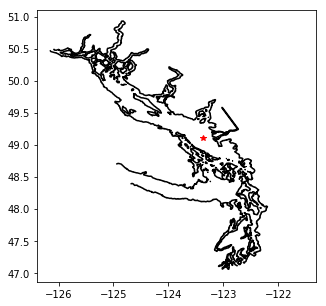

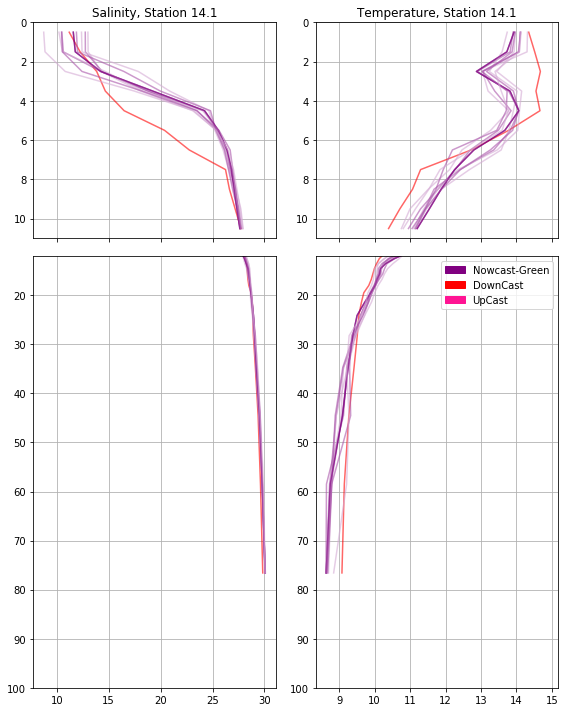

In [25]:
where(stationdata.iloc[[13]])
cast = casts[14.1]
Yind, Xind = geo_tools.find_closest_model_point(stationdata.iloc[[13]]['LonDecDeg'].values[0], 
                                                stationdata.iloc[[13]]['LatDecDeg'].values[0],
                                                X, Y, land_mask = bathy.mask)
base=nc.Dataset('/results/SalishSea/nowcast-green/31may17/SalishSea_1h_20170531_20170531_grid_T.nc')

shape_depth = cast.dCast['depth_m'].values.shape[0]
fig, ax = plt.subplots(2,2,figsize = (8,10), gridspec_kw = {'height_ratios':[1, 2]} )
deptht = cast.dCast['depth_m'].values
cast_sal_down = cast.dCast['gsw_srA0'].values
cast_temp_down = cast.dCast['gsw_ctA0'].values
ax[0,0].plot(cast_sal_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,0].plot(cast_sal_down[11:], deptht[11:], 'r-', alpha = 0.6)
ax[0,1].plot(cast_temp_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,1].plot(cast_temp_down[11:], deptht[11:], 'r-', alpha = 0.6)
if int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][3:5]) < 30:
    delta = (30 + int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][3:5])) / 60
    before = int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][:2]) - 1
else:
    delta = (int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
    before = int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][:2])
n = 1
for j in range(Yind - 2, Yind + 3):
    pt_mask = tmask[0,:shape_depth,j,Xind]
    masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,j, Xind]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,j, Xind],
                                  mask = 1-pt_mask)
    
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,j, Xind]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                   mask = 1-pt_mask)
   
    ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[n], alpha = 0.6)
    
    ax[1,0].plot(base_sal[11:], deptht[11:], color = purples[n], alpha = 0.6)
    
    ax[0,1].plot(base_temp[:11], deptht[:11], color = purples[n], alpha = 0.6)
    
    ax[1,1].plot(base_temp[11:], deptht[11:], color = purples[n], alpha = 0.6)
   
    n = n + 1
m = 1
for i in range(Xind - 2, Xind + 3):
    pt_mask = tmask[0,:shape_depth,Yind,i]
    masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, i]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, i],
                                  mask = 1-pt_mask)
    
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, i]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                   mask = 1-pt_mask)
   
    ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[m], alpha = 0.6)
    
    ax[1,0].plot(base_sal[11:], deptht[11:], color = purples[m], alpha = 0.6)
    
    ax[0,1].plot(base_temp[:11], deptht[:11], color = purples[m], alpha = 0.6)
   
    ax[1,1].plot(base_temp[11:], deptht[11:], color = purples[m], alpha = 0.6)
    
    m = m + 1
min_sal = np.nanmin(np.array([ np.nanmin(cast_sal_down), 
                              np.nanmin(base_sal)]))
max_sal = np.nanmax(np.array([ np.nanmax(cast_sal_down), 
                              np.nanmax(base_sal)]))
min_temp = np.nanmin(np.array([np.nanmin(cast_temp_down), 
                             np.nanmin(base_temp)]))
max_temp = np.nanmax(np.array([ np.nanmax(cast_temp_down), 
                             np.nanmax(base_temp)]))
ax[0,0].set_ylim(11,0)
ax[0,1].set_ylim(11,0)
ax[1,0].set_ylim(100,12)
ax[1,1].set_ylim(100,12)
ax[0,0].set_xlim(min_sal-1,max_sal+1)
ax[0,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[1,0].set_xlim(min_sal-1,max_sal+1)
ax[1,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[0,0].set_title('Salinity, Station 14.1')
ax[0,1].set_title('Temperature, Station 14.1')
ax[0,0].tick_params(labelbottom='off')
ax[0,1].tick_params(labelbottom='off')
ax[0,0].grid('on')
ax[0,1].grid('on')
ax[1,0].grid('on')
ax[1,1].grid('on')
purple_patch = mpatches.Patch(color='purple', label='Nowcast-Green')
red_patch = mpatches.Patch(color = 'red', label = 'DownCast')
pink_patch = mpatches.Patch(color = 'deeppink', label = 'UpCast')
plt.legend(handles = [purple_patch,
                      red_patch, pink_patch])
fig.tight_layout()

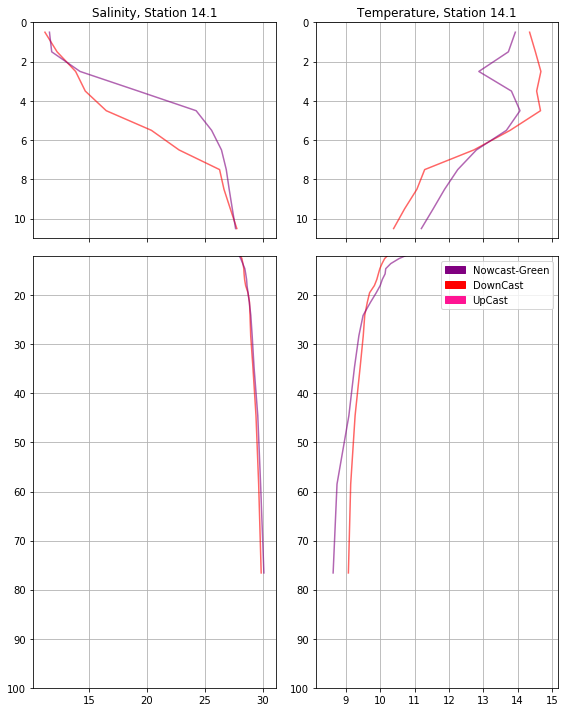

In [26]:
cast = casts[14.1]
Yind, Xind = geo_tools.find_closest_model_point(stationdata.iloc[[13]]['LonDecDeg'].values[0], 
                                                stationdata.iloc[[13]]['LatDecDeg'].values[0],
                                                X, Y, land_mask = bathy.mask)
base=nc.Dataset('/results/SalishSea/nowcast-green/31may17/SalishSea_1h_20170531_20170531_grid_T.nc')

shape_depth = cast.dCast['depth_m'].values.shape[0]
fig, ax = plt.subplots(2,2,figsize = (8,10), gridspec_kw = {'height_ratios':[1, 2]} )
deptht = cast.dCast['depth_m'].values
cast_sal_down = cast.dCast['gsw_srA0'].values
cast_temp_down = cast.dCast['gsw_ctA0'].values
ax[0,0].plot(cast_sal_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,0].plot(cast_sal_down[11:], deptht[11:], 'r-', alpha = 0.6)
ax[0,1].plot(cast_temp_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,1].plot(cast_temp_down[11:], deptht[11:], 'r-', alpha = 0.6)
if int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][3:5]) < 30:
    delta = (30 + int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][3:5])) / 60
    before = int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][:2]) - 1
else:
    delta = (int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
    before = int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][:2])

pt_mask = tmask[0,:shape_depth,Yind,Xind]
masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                              + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                              mask = 1-pt_mask)

base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)

ax[0,0].plot(base_sal[:11], deptht[:11], color = 'purple', alpha = 0.6)

ax[1,0].plot(base_sal[11:], deptht[11:], color = 'purple', alpha = 0.6)

ax[0,1].plot(base_temp[:11], deptht[:11], color = 'purple', alpha = 0.6)

ax[1,1].plot(base_temp[11:], deptht[11:], color = 'purple', alpha = 0.6)

min_sal = np.nanmin(np.array([ np.nanmin(cast_sal_down), 
                              np.nanmin(base_sal)]))
max_sal = np.nanmax(np.array([ np.nanmax(cast_sal_down), 
                              np.nanmax(base_sal)]))
min_temp = np.nanmin(np.array([np.nanmin(cast_temp_down), 
                             np.nanmin(base_temp)]))
max_temp = np.nanmax(np.array([ np.nanmax(cast_temp_down), 
                             np.nanmax(base_temp)]))
ax[0,0].set_ylim(11,0)
ax[0,1].set_ylim(11,0)
ax[1,0].set_ylim(100,12)
ax[1,1].set_ylim(100,12)
ax[0,0].set_xlim(min_sal-1,max_sal+1)
ax[0,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[1,0].set_xlim(min_sal-1,max_sal+1)
ax[1,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[0,0].set_title('Salinity, Station 14.1')
ax[0,1].set_title('Temperature, Station 14.1')
ax[0,0].tick_params(labelbottom='off')
ax[0,1].tick_params(labelbottom='off')
ax[0,0].grid('on')
ax[0,1].grid('on')
ax[1,0].grid('on')
ax[1,1].grid('on')
purple_patch = mpatches.Patch(color='purple', label='Nowcast-Green')
red_patch = mpatches.Patch(color = 'red', label = 'DownCast')
pink_patch = mpatches.Patch(color = 'deeppink', label = 'UpCast')
plt.legend(handles = [purple_patch, 
                      red_patch, pink_patch])
fig.tight_layout()

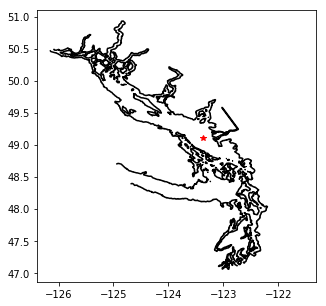

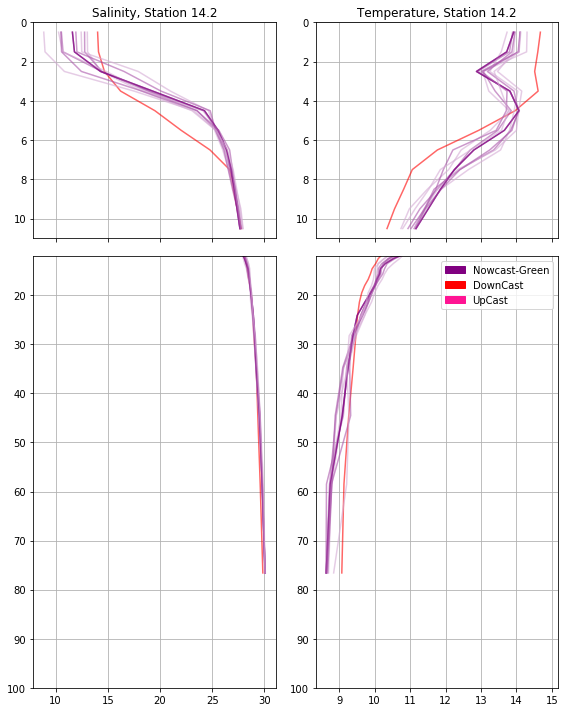

In [27]:
where(stationdata.iloc[[14]])
cast = casts[14.2]
Yind, Xind = geo_tools.find_closest_model_point(stationdata.iloc[[14]]['LonDecDeg'].values[0], 
                                                stationdata.iloc[[14]]['LatDecDeg'].values[0],
                                                X, Y, land_mask = bathy.mask)
base=nc.Dataset('/results/SalishSea/nowcast-green/31may17/SalishSea_1h_20170531_20170531_grid_T.nc')

shape_depth = cast.uCast['depth_m'].values.shape[0]
fig, ax = plt.subplots(2,2,figsize = (8,10), gridspec_kw = {'height_ratios':[1, 2]} )
deptht = cast.uCast['depth_m'].values
cast_sal_down = cast.uCast['gsw_srA0'].values
cast_temp_down = cast.uCast['gsw_ctA0'].values
ax[0,0].plot(cast_sal_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,0].plot(cast_sal_down[11:], deptht[11:], 'r-', alpha = 0.6)
ax[0,1].plot(cast_temp_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,1].plot(cast_temp_down[11:], deptht[11:], 'r-', alpha = 0.6)
if int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][3:5]) < 30:
    delta = (30 + int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][3:5])) / 60
    before = int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][:2]) - 1
else:
    delta = (int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
    before = int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][:2])
n = 1
for j in range(Yind - 2, Yind + 3):
    pt_mask = tmask[0,:shape_depth,j,Xind]
    masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,j, Xind]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,j, Xind],
                                  mask = 1-pt_mask)
    
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,j, Xind]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                   mask = 1-pt_mask)
    
    ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[n], alpha = 0.6)
    
    ax[1,0].plot(base_sal[11:], deptht[11:], color = purples[n], alpha = 0.6)
    
    ax[0,1].plot(base_temp[:11], deptht[:11], color = purples[n], alpha = 0.6)
    
    ax[1,1].plot(base_temp[11:], deptht[11:], color = purples[n], alpha = 0.6)
    
    n = n + 1
m = 1
for i in range(Xind - 2, Xind + 3):
    pt_mask = tmask[0,:shape_depth,Yind,i]
    masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, i]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, i],
                                  mask = 1-pt_mask)
    
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, i]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                   mask = 1-pt_mask)
    
    ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[m], alpha = 0.6)
    
    ax[1,0].plot(base_sal[11:], deptht[11:], color = purples[m], alpha = 0.6)
    
    ax[0,1].plot(base_temp[:11], deptht[:11], color = purples[m], alpha = 0.6)
    
    ax[1,1].plot(base_temp[11:], deptht[11:], color = purples[m], alpha = 0.6)
    
    m = m + 1
min_sal = np.nanmin(np.array([ np.nanmin(cast_sal_down), 
                              np.nanmin(base_sal)]))
max_sal = np.nanmax(np.array([ np.nanmax(cast_sal_down), 
                              np.nanmax(base_sal)]))
min_temp = np.nanmin(np.array([np.nanmin(cast_temp_down), 
                             np.nanmin(base_temp)]))
max_temp = np.nanmax(np.array([ np.nanmax(cast_temp_down), 
                             np.nanmax(base_temp)]))
ax[0,0].set_ylim(11,0)
ax[0,1].set_ylim(11,0)
ax[1,0].set_ylim(100,12)
ax[1,1].set_ylim(100,12)
ax[0,0].set_xlim(min_sal-1,max_sal+1)
ax[0,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[1,0].set_xlim(min_sal-1,max_sal+1)
ax[1,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[0,0].set_title('Salinity, Station 14.2')
ax[0,1].set_title('Temperature, Station 14.2')
ax[0,0].tick_params(labelbottom='off')
ax[0,1].tick_params(labelbottom='off')
ax[0,0].grid('on')
ax[0,1].grid('on')
ax[1,0].grid('on')
ax[1,1].grid('on')
purple_patch = mpatches.Patch(color='purple', label='Nowcast-Green')
red_patch = mpatches.Patch(color = 'red', label = 'DownCast')
pink_patch = mpatches.Patch(color = 'deeppink', label = 'UpCast')
plt.legend(handles = [purple_patch, 
                      red_patch, pink_patch])
fig.tight_layout()

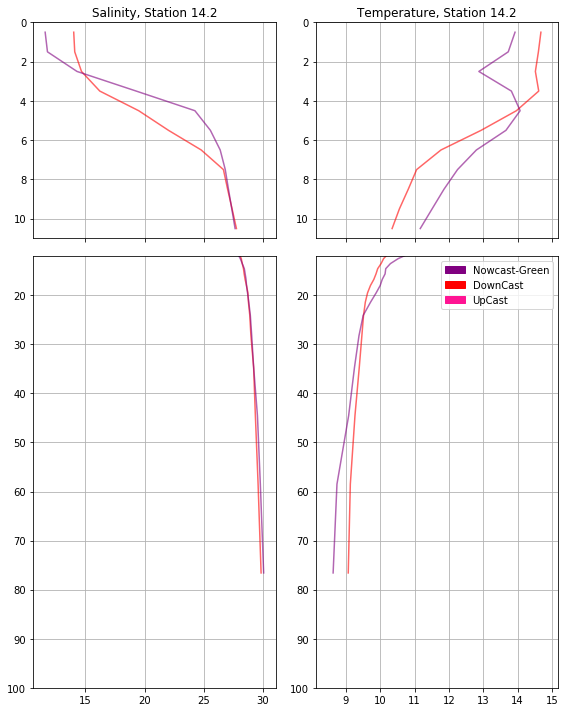

In [28]:
cast = casts[14.2]
Yind, Xind = geo_tools.find_closest_model_point(stationdata.iloc[[14]]['LonDecDeg'].values[0], 
                                                stationdata.iloc[[14]]['LatDecDeg'].values[0],
                                                X, Y, land_mask = bathy.mask)
base=nc.Dataset('/results/SalishSea/nowcast-green/31may17/SalishSea_1h_20170531_20170531_grid_T.nc')

shape_depth = cast.uCast['depth_m'].values.shape[0]
fig, ax = plt.subplots(2,2,figsize = (8,10), gridspec_kw = {'height_ratios':[1, 2]} )
deptht = cast.uCast['depth_m'].values
cast_sal_down = cast.uCast['gsw_srA0'].values
cast_temp_down = cast.uCast['gsw_ctA0'].values
ax[0,0].plot(cast_sal_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,0].plot(cast_sal_down[11:], deptht[11:], 'r-', alpha = 0.6)
ax[0,1].plot(cast_temp_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,1].plot(cast_temp_down[11:], deptht[11:], 'r-', alpha = 0.6)
if int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][3:5]) < 30:
    delta = (30 + int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][3:5])) / 60
    before = int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][:2]) - 1
else:
    delta = (int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
    before = int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][:2])
pt_mask = tmask[0,:shape_depth,Yind,Xind]
masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                              + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                              mask = 1-pt_mask)

base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)

ax[0,0].plot(base_sal[:11], deptht[:11], color = 'purple', alpha = 0.6)

ax[1,0].plot(base_sal[11:], deptht[11:], color = 'purple', alpha = 0.6)

ax[0,1].plot(base_temp[:11], deptht[:11], color = 'purple', alpha = 0.6)

ax[1,1].plot(base_temp[11:], deptht[11:], color = 'purple', alpha = 0.6)

min_sal = np.nanmin(np.array([ np.nanmin(cast_sal_down), 
                              np.nanmin(base_sal)]))
max_sal = np.nanmax(np.array([ np.nanmax(cast_sal_down), 
                              np.nanmax(base_sal)]))
min_temp = np.nanmin(np.array([np.nanmin(cast_temp_down), 
                             np.nanmin(base_temp)]))
max_temp = np.nanmax(np.array([ np.nanmax(cast_temp_down), 
                             np.nanmax(base_temp)]))
ax[0,0].set_ylim(11,0)
ax[0,1].set_ylim(11,0)
ax[1,0].set_ylim(100,12)
ax[1,1].set_ylim(100,12)
ax[0,0].set_xlim(min_sal-1,max_sal+1)
ax[0,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[1,0].set_xlim(min_sal-1,max_sal+1)
ax[1,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[0,0].set_title('Salinity, Station 14.2')
ax[0,1].set_title('Temperature, Station 14.2')
ax[0,0].tick_params(labelbottom='off')
ax[0,1].tick_params(labelbottom='off')
ax[0,0].grid('on')
ax[0,1].grid('on')
ax[1,0].grid('on')
ax[1,1].grid('on')
purple_patch = mpatches.Patch(color='purple', label='Nowcast-Green')

red_patch = mpatches.Patch(color = 'red', label = 'DownCast')
pink_patch = mpatches.Patch(color = 'deeppink', label = 'UpCast')
plt.legend(handles = [purple_patch,  
                      red_patch, pink_patch])
fig.tight_layout()

In [29]:
ups_temperature = np.ma.masked_array(np.zeros((19, 27)), mask = True)
downs_temperature = np.ma.masked_array(np.zeros((19, 27)), mask = True)
ups_salinity = np.ma.masked_array(np.zeros((19, 27)), mask = True)
downs_salinity = np.ma.masked_array(np.zeros((19, 27)), mask = True)
for n in range(19):
    length_up = casts[stationdata['Station'].values[n]].uCast['depth_m'].values.shape[0]
    length_down = casts[stationdata['Station'].values[n]].dCast['depth_m'].values.shape[0]
    ups_sals = casts[stationdata['Station'].values[n]].uCast['gsw_srA0'].values
    down_sals = casts[stationdata['Station'].values[n]].dCast['gsw_srA0'].values
    ups_temps = casts[stationdata['Station'].values[n]].uCast['gsw_ctA0'].values
    down_temps = casts[stationdata['Station'].values[n]].dCast['gsw_ctA0'].values
    for m in range(length_up):
        ups_temperature[n,m].mask = False
        ups_salinity[n,m].mask = False
        ups_temperature[n,m] = ups_temps[m]
        ups_salinity[n,m] = ups_sals[m]
    for f in range(length_down):
        downs_temperature[n,f].mask = False
        downs_salinity[n,f].mask = False
        downs_temperature[n,f] = down_temps[f]
        downs_salinity[n,f] = down_sals[f] 

In [30]:
model_base_temp = np.ma.masked_array(np.zeros((19,27)), mask = True)
model_base_sal = np.ma.masked_array(np.zeros((19,27)), mask = True)
for n in range(19):
    print(n)
    station = stationdata.iloc[[n]]
    cast = casts[stationdata['Station'].values[n]]
    Yind, Xind = geo_tools.find_closest_model_point(stationdata['LonDecDeg'].values[n], 
                                                    stationdata['LatDecDeg'].values[n],
                                                    X, Y, land_mask = bathy.mask)
    if station['Date'].values == 20170410:
        base=nc.Dataset('/results/SalishSea/nowcast-green/10apr17/SalishSea_1h_20170410_20170410_grid_T.nc')
        
    else: 
        base=nc.Dataset('/results/SalishSea/nowcast-green/31may17/SalishSea_1h_20170531_20170531_grid_T.nc')

    if n ==13:
        shape_depth = cast.dCast['depth_m'].values.shape[0]
    else:
        shape_depth = cast.uCast['depth_m'].values.shape[0]
    if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
        delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
    else:
        delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2])
    pt_mask = tmask[0,:shape_depth,Yind,Xind]
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                                  mask = 1-pt_mask)
    for m in range(shape_depth):
        model_base_sal[n,m].mask = False
        model_base_sal[n,m] = base_sal[m]
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
    for m in range(shape_depth):
        model_base_temp[n,m].mask = False
        model_base_temp[n,m] = base_temp[m]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [31]:
depths = casts[15].uCast['depth_m'].values

In [32]:
ctd_sals = np.ma.masked_array(np.zeros((38, 27)), mask = True)
ctd_temps = np.ma.masked_array(np.zeros((38,27)), mask = True)
for n in range(27):
    ctd_sals[:,n].mask = np.append(ups_salinity[:,n].mask, downs_salinity[:,n].mask)
    ctd_sals[:,n] = np.append(ups_salinity[:,n], downs_salinity[:,n])
    ctd_temps[:,n].mask = np.append(ups_temperature[:,n].mask, downs_temperature[:,n].mask)
    ctd_temps[:,n] = np.append(ups_temperature[:,n], downs_temperature[:,n])
ctd_sals = np.ma.masked_equal(ctd_sals, 0)
ctd_temps = np.ma.masked_equal(ctd_temps, 0)
ctd_sals = np.ma.masked_invalid(ctd_sals)
ctd_temps = np.ma.masked_invalid(ctd_temps)

In [33]:
model_base_sal_full = np.zeros((38, 27))
model_base_temp_full = np.zeros((38,27))
for n in range(27):
    model_base_sal_full[:,n] = np.append(model_base_sal[:,n], model_base_sal[:,n])
    model_base_temp_full[:,n] = np.append(model_base_temp[:,n], model_base_temp[:,n])

In [34]:
model_base_sal_full_masked = np.ma.masked_array(model_base_sal_full, ctd_sals.mask)
model_base_temp_full_masked = np.ma.masked_array(model_base_temp_full, ctd_temps.mask)

In [36]:
model_base_sal_full_masked = np.ma.masked_equal(model_base_sal_full_masked, 0)
model_base_temp_full_masked = np.ma.masked_equal(model_base_temp_full_masked, 0)
ctd_sals.mask = model_base_sal_full_masked.mask
ctd_temps.mask = model_base_temp_full_masked.mask

In [37]:
base_bias_sal = np.array([np.ma.mean(model_base_sal_full_masked[:,n]) 
                      - np.ma.mean(ctd_sals[:,n]) for n in range(27)])
base_RMSE_sal = np.array([np.sqrt(np.sum((model_base_sal_full_masked[:,n] - ctd_sals[:,n])**2)
                     / model_base_sal_full_masked[:,n].count()) for n in range(27)])
base_willmott_sal = np.array([1-(np.sum((model_base_sal_full_masked[:,n] - ctd_sals[:,n])**2)  / 
                             np.sum((np.abs(model_base_sal_full_masked[:,n] - 
                                            np.mean(ctd_sals[:,n])) + 
                                     np.abs(model_base_sal_full_masked[:,n] - 
                                            np.mean(ctd_sals[:,n])))**2)) for n in range(27)])
base_bias_temp = np.array([np.ma.mean(model_base_temp_full_masked[:,n]) 
                      - np.ma.mean(ctd_temps[:,n]) for n in range(27)])
base_RMSE_temp = np.array([np.sqrt(np.sum((model_base_temp_full_masked[:,n] - ctd_temps[:,n])**2)
                     / model_base_temp_full_masked[:,n].count()) for n in range(27)])
base_willmott_temp = np.array([1-(np.sum((model_base_temp_full_masked[:,n] - ctd_temps[:,n])**2)  / 
                             np.sum((np.abs(model_base_temp_full_masked[:,n] - 
                                            np.mean(ctd_temps[:,n])) + 
                                     np.abs(model_base_temp_full_masked[:,n] - 
                                            np.mean(ctd_temps[:,n])))**2)) for n in range(27)])

In [38]:
number_of_samples = np.array([ctd_sals[:,n].count() for n in range(27)])

In [39]:
a = pd.DataFrame()
a = a.assign(depth_m = depths)
b = a.assign(base_case_bias_sal = base_bias_sal)
b = b.assign(base_case_rmse_sal = base_RMSE_sal)
b = b.assign(base_case_willmott_sal = base_willmott_sal)
b = b.assign(base_case_bias_temp = base_bias_temp)
b = b.assign(base_case_rmse_temp = base_RMSE_temp)
b = b.assign(base_case_willmott_temp = base_willmott_temp)
b = b.assign(number_of_points = number_of_samples)

In [40]:
b.keys()

Index(['depth_m', 'base_case_bias_sal', 'base_case_rmse_sal',
       'base_case_willmott_sal', 'base_case_bias_temp', 'base_case_rmse_temp',
       'base_case_willmott_temp', 'number_of_points'],
      dtype='object')

In [41]:
b

depth_m  base_case_bias_sal  base_case_rmse_sal  base_case_willmott_sal  \
0    0.500000            2.312100            6.724076                0.890943   
1    1.500003            0.242436            5.155962                0.933142   
2    2.500011           -0.669929            4.413275                0.939418   
3    3.500031           -1.171235            4.755642                0.923504   
4    4.500071           -0.627519            3.867388                0.934504   
5    5.500151            0.178196            1.453912                0.988189   
6    6.500310            0.317996            1.280628                0.990736   
7    7.500623           -0.034096            0.739601                0.997143   
8    8.501236           -0.081118            0.705008                0.997442   
9    9.502433           -0.155557            0.633783                0.998070   
10  10.504766           -0.103621            0.482517                0.839424   
11  11.509312           -0.154002            0.457407                0.852622   
12  12.518167           -0.162023            0.431769                0.864778   
13  13.535412           -0.144664            0.412254                0.874804   
14  14.568982           -0.097013            0.397529                0.879346   
15  15.634288           -0.063053            0.387196                0.877369   
16  16.761173           -0.054657            0.388561                0.877299   
17  18.007135           -0.064372            0.360567                0.888864   
18  19.481785           -0.050095            0.328741                0.895378   
19  21.389978           -0.043206            0.303715                0.891550   
20  24.100256           -0.045306            0.262023                0.909616   
21  28.229916            0.072733            0.211764                0.923729   
22  34.685757            0.186301            0.207981                0.877356   
23  44.517723            0.243090            0.269609                0.772809   
24  58.484333            0.268977            0.316119                0.688737   
25  76.585587            0.293834            0.323431                0.707576   
26  98.062958            0.239688            0.239709                0.749956   

    base_case_bias_temp  base_case_rmse_temp  base_case_willmott_temp  \
0              0.297793             0.797657                 0.977382   
1              0.192991             0.800090                 0.973732   
2              0.045000             0.828592                 0.968540   
3              0.056186             0.617370                 0.983307   
4              0.313513             0.706521                 0.978995   
5              0.408888             0.833377                 0.968593   
6              0.266190             0.763403                 0.967325   
7              0.323779             0.773073                 0.963897   
8              0.289413             0.716935                 0.964367   
9              0.284879             0.676219                 0.963948   
10             0.211081             0.594667                 0.964148   
11             0.268553             0.603369                 0.954323   
12             0.259722             0.604142                 0.949813   
13             0.231580             0.583141                 0.948635   
14             0.222262             0.588977                 0.945234   
15             0.204335             0.560357                 0.945694   
16             0.206352             0.572470                 0.940130   
17             0.227900             0.580762                 0.935535   
18             0.222400             0.553950                 0.935621   
19             0.199417             0.518926                 0.935448   
20             0.134453             0.406476                 0.947689   
21             0.061971             0.333911                 0.949735   
22            -0.081678             0.211268              

In [42]:
def plot_plume_salinity(file, ax):
    t = ax.pcolormesh(np.ma.masked_array(file.variables['vosaline'][19, 0, ...],
                                         mask = 1 - tmask[0,0,...]),
                      cmap = cmocean.cm.haline)
    fig.colorbar(t, ax=ax)
    ax.set_ylim(300,600)
    ax.set_xlim(150,400)
    return ax

In [49]:
apr10base=nc.Dataset('/results/SalishSea/nowcast-green/10apr17/SalishSea_1h_20170410_20170410_grid_T.nc')

        
may31base=nc.Dataset('/results/SalishSea/nowcast-green/31may17/SalishSea_1h_20170531_20170531_grid_T.nc')      

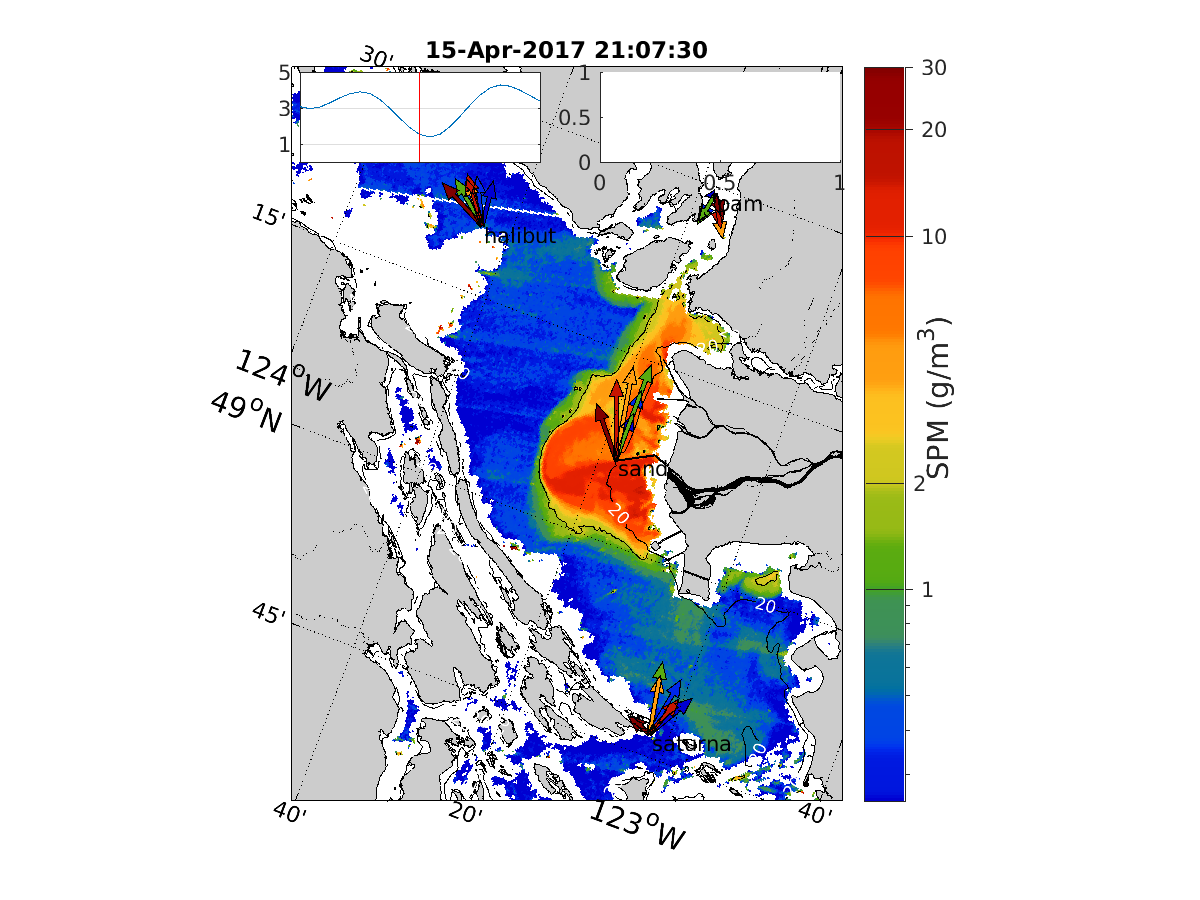

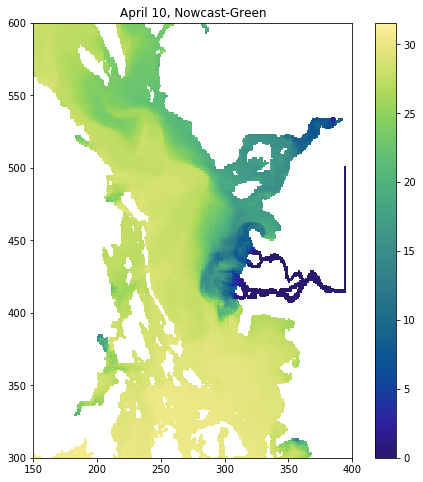

In [46]:
fig, ax = plt.subplots( figsize = (8,8))
q = plot_plume_salinity(apr10base, ax)
viz_tools.set_aspect(q)
q.set_title('April 10, Nowcast-Green')
Image('/home/vdo/Downloads/plume1.png')

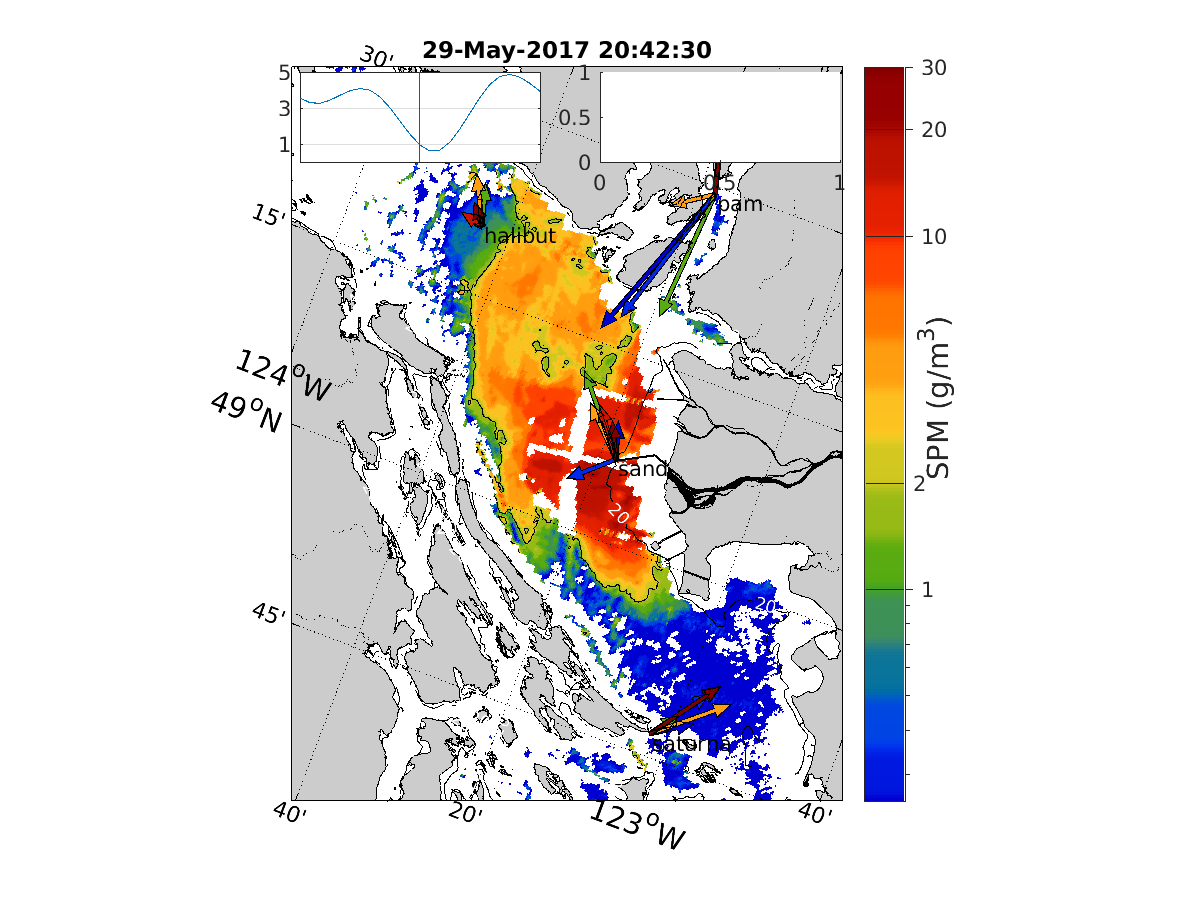

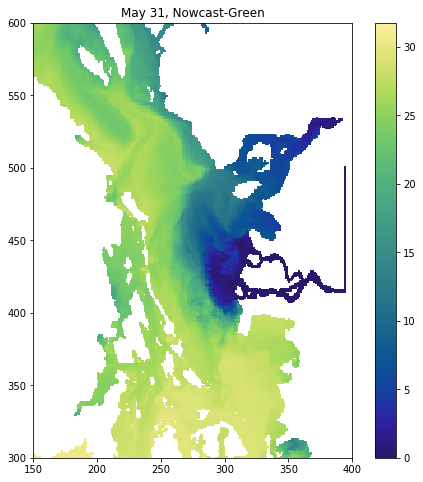

In [50]:
fig, ax = plt.subplots( figsize = (8,8))
y = plot_plume_salinity(may31base, ax)
y.set_title('May 31, Nowcast-Green')
viz_tools.set_aspect(y)
Image('/home/vdo/Downloads/plume2.png')